# **Klima Dao Twitter Analytics (Part 1)**
**By Ruiz Rivera | Data Science, BrainStation**

*Submitted on April 4th, 2022*

Previous notebook: [Twitter Scraper](https://colab.research.google.com/drive/1GLyOgPQ-qNovCmY9Iz5-rDKM_-w1ahku?usp=sharing)

Next notebook: [Klima Dao Twitter Analytics (Part 2)](https://colab.research.google.com/drive/16c-QLQSxR0DfFe7do8QQbeJHrIRnutij?usp=sharing)

# **Introduction**


  Klima is a decentralized autonomous organization (DAO) that's on a mission to democratize climate action and integrate the limits of the natural environment within our modern-day economic systems. To achieve its [mission](https://www.klimadao.finance/blog/the-vision-of-a-carbon-currency), the DAO launched its cryptocurrency called \$KLIMA, which represents a few things: One is a share of governance over the DAO, as well as a store of value (currency) backed by "on-chain" carbon assets. 

  In the new paradigm of Regenerative Finance (ReFi), "on-chain carbon assets" refer to carbon credits whose data has been stored on the blockchain, creating greater transparency and enabling their collaterization as financial assets. Before we saw blockchain innovations, carbon credits were almost a dead-end in terms of value creation in the sense that people who owned them couldn't do much with them besides maybe hanging them on a wall.

Klima DAO takes these innovations a step further by incentivizing demand for these on-chain assets (such as [\$BCT](https://coinmarketcap.com/currencies/toucan-protocol-base-carbon-tonne/) or [\$MCO2](https://coinmarketcap.com/currencies/moss-carbon-credit/)) by offering [\$KLIMA](https://coinmarketcap.com/currencies/klimadao/) at a discounted rate, and using them as the reserve for their cryptocurrency. In the eight months since the project's launched, it's already locked in 12.9 *million* tonnes of carbon which, to put into context, is greater than the 2020 carbon emissions of all of Croatia. Klima aims to be at the center of the ReFi ecosystem that itself and a coalition of other stakeholders are working hard to bootstrap. 

As a climate-tech startup in its infancy, it's vastly important for the DAO to spread awareness and educate people about its brand and the overall ReFi ecosystem. Twitter is often the go-to social media platform for discourse on a wide range of exciting topics, such as Blockchain, Crypto, Decentralized Finance, Climate Activism, Data Science, and Machine Learning. As a member of the DAO myself, there is a need to monitor the brand's health on one of the largest social media titans as it continues to build towards becoming a mainstay in the public's consciousness. Having more participation in the ReFi ecosystem directly equates to increasing Klima’s likelihood to succeed years out into the future.

## **Defining the Business Question**

  *In this project, **the business goal** is to help fulfill this need for monitoring the brand's health and leverage Machine Learning to find and recommend actionable insights that might better optimize brand visibility in the Twittersphere.* Had I acquired a corporate developer account for Twitter, I'd be able to track the *page views* that a tweet gets, which would have been perfect for gauging brand visibility. However, we didn't have that option so I chose to track the next best metric for the **dependent variable** in my research, which is the *number of retweets* that a tweet gets. **Retweets** are excellent for brand visibility because of their multiplier effect in spreading messages amongst the retweeters' broad networks. In examining retweets, I will specifically focus on:
- A) Studying the factors that contribute most to whether or not a tweet gets retweeted (a binary classification problem); and 
- B) The *degree* to which a tweet goes *viral* (gets retweeted in our use case). For this variable, I placed the number of retweets into bins and converted the problem into a multi-class classification problem, which I'll detail later on.


  The workflow for this process will mirror that of a typical Data Science Project Life Cycle where we’ll run the following steps:
1. Defining the business requirement (which we’ve done already)
2. Data Collection
3. Data Cleaning
4. Exploratory Data Analysis
5. Data Modeling

  a. Binary Classification 

<br>

  The [notebook](https://colab.research.google.com/drive/16c-QLQSxR0DfFe7do8QQbeJHrIRnutij?usp=sharing) for the second stage of this project will conclude with the following steps: 
5. Data Modelling
  
  b. Multi-Class Classification (Part 2)

6. Recommendation
7. Conclusion

</br>

  And with that out of the way, let's dig deep into retweets amongst the crypto/DeFi/ReFi community on Twitter. 

# **Data Collection**

  Since early February 2022, I’ve been building my dataset by scraping data on individual tweets through Twitter’s API which required having a Twitter developer account with it's own key and access token. However, I experienced several instances of the API constraining the data collecting process. The first is that Twitter doesn’t allow developers to scrape data over seven days past the date that you’re accessing the API. So, for example, if I were to use the API on Monday, April 4th, I would only have access to tweets as far back as last Monday, March 28th. As a result of this constraint, data scraping became a weekly task since it was especially pertinent for me to gather Klima-related tweets since I was interested in tracking the brand’s overall health since the New Year. There was also a limit on the amount of data I could gather about crypto projects that aren’t as popular yet with the crypto community, such as Moss Earth or Toucan Protocol, which were only mentioned about 500 times within a week.

  The other constraint I had with the API was that it restricted me from scraping no more than 2,100 rows of data max in a single API request. So, for example, if I were to scrape data on a well-known crypto project such as Ethereum, I would probably have access to only a day’s worth of tweets since the brand is often mentioned over 2,000 times in a single day! With each API request, I decided to save a hard copy of the data in separate CSV files before concatenating them all within a single dataset.

  At the time of submitting my project, I had managed to collect roughly 55,000 tweets. Unfortunately, the Google Colab notebook I used for this project would often crash as it was running the models at the latter stages of the notebook, which forced me to split the workload into a separate notebook. As a result, I used this notebook for running my binary classification models, while the second notebook ran the code for my multi-class classification models.

  First, let's install the following packages and libraries necessary to run our predictive models, as well as the dataset. We also used a few custom-made functions developed by the education team at Brainstation and those who contributed to Sklearn's open source software.

In [1]:
!pip install --upgrade plotly

     |████████████████████████████████| 27.7 MB 5.4 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [2]:
!pip install ipython-autotime

In [3]:
%load_ext autotime

time: 142 µs (started: 2022-04-04 14:22:19 +00:00)


In [4]:
import tweepy
import pandas as pd
import numpy as np
import ast
import re
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from collections import Counter
from google.colab import files

# NLP Libraries
import spacy
import string
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS

# Machine Learning Libraries
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import r2_score, plot_confusion_matrix, classification_report, f1_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

# Notebook Setting Preferences
import warnings
warnings.filterwarnings("ignore")
plt.style.use('dark_background')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


time: 5.08 s (started: 2022-04-04 14:22:19 +00:00)


In [5]:
uploaded = files.upload()

Saving defi_tweets-v1.1.csv to defi_tweets-v1.1.csv
time: 1h 1min 32s (started: 2022-04-04 14:22:24 +00:00)


  Tweets mentioning Klima DAO made up the largest portion of my dataset at ~20%. To build my training set, I also scraped tweets from other prominent crypto projects, such as Ethereum, Bitcoin, and Terra. Below is a detailed breakdown of the other cryptocurrencies that I incorporated into my dataset, including the search terms I used and the proportion to which they represented the dataset:

| Name | Ticker | Percentage | Search Terms |
| ---- | ------ | ---------- | ------------ |
| Klima DAO | \$KLIMA | 20% | \@KlimaDAO, \$KLIMA |
| Ethereum | \$ETH | 15% | \@Ethereum, \$ETH |
| Terra | \$LUNA | 11% | \@terra_money, \$LUNA |
| Olympus DAO | \$OHM | 9% | \@OlympusDAO, \$OHM |
| Algorand | \$ALGO | 9% | \@Algorand, \$ALGO |
| Bitcoin | \$BTC | 8% | \@Bitcoin, \$BTC |
| Gitcoin DAO | \$GTC | 5% | \@Gitcoin, \@GitcoinDAO, \$GTC |
| Dovu | \$DOV | 5% | \@dovuofficial, \$DOV |
| Chainlink | \$LINK | 4% | \@chainlink, \@chainlinklabs, \$LINK |
| Celo | \$CELO | 4% | \@CeloOrg, \$CELO |
| Toucan Protocol | \$BCT | 3% | \@ToucanProtocol, \$BCT |
| Terra | \$UST | 3% | \$UST |
| Ethereum Classic | \$ETC | 3% | \@eth_classic, \$ETC |
| Moss | \$MCO2 | 2% | \@MCO2token, \$MCO2 |
| Lido Finance | \$LDO | 0.6% | \@LidoFinance, \$LDO |
| Ubeswap | \$UBE | 0.3% | \@ubeswap, \$UBE |

In [6]:
def plot_most_frequent(words, word_counts, top=20):
  """
  A function designed to plot the most frequent words from a vectorized sparse matrix.
  Credits go to the author of the BrainStation Jupyter Notebook used for teaching purposes titled "Text Data"
  The notebook was stored as a Google Colab Notebook and is available in the link below:
  https://drive.google.com/file/d/1e_-r0LfHIGgH4Ksn3sKqmaZP3QXfn3mt/view?usp=sharing
  """
  words_df = pd.DataFrame({"token": words, 
                             "count": word_counts})
    
  fig, ax = plt.subplots(figsize=(0.75*top, 5))
  words_df.sort_values(by="count", ascending=False).head(top)\
      .set_index("token")\
      .plot(kind="bar", rot=45, ax=ax)
  # sns.despine()
  plt.title("Most frequent tokens")
  plt.show()

time: 7.12 ms (started: 2022-04-04 15:23:56 +00:00)


In [7]:
def plot_top_words(model, feature_names, n_top_words, title):
  """
  Function taken from Sklearn's topic extraction with LDA page on their website below:
  (https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda).
  Credits go to the authors of this code:
  - Olivier Grisel <olivier.grisel@ensta.org>
  - Lars Buitinck
  - Chyi-Kwei Yau <chyikwei.yau@gmail.com>
  """
  fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
  axes = axes.flatten()
  for topic_idx, topic in enumerate(model.components_):
      top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
      top_features = [feature_names[i] for i in top_features_ind]
      weights = topic[top_features_ind]

      ax = axes[topic_idx]
      ax.barh(top_features, weights, height=0.7)
      ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
      ax.invert_yaxis()
      ax.tick_params(axis="both", which="major", labelsize=20)
      for i in "top right left".split():
          ax.spines[i].set_visible(False)
      fig.suptitle(title, fontsize=40)

  plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
  plt.show()

time: 22.6 ms (started: 2022-04-04 15:23:56 +00:00)


## **Literature Review**

  Before we dig deep into the data, let's first examine the literature related to this topic. Prof. Suh and his colleagues (2010) did a similar study of predicting for the binary outcome of a retweet with a Generalized Linear Model from a dataset containing 74 million rows of data. Prof. Nessi and his colleagues (2018) at the University of Florence also conducted a similar study where they scraped 100 million rows of Twitter data on a range of different topics and modelled the probability and degree to which a tweet will get retweeted. They found that amongst models predicting binary retweet outcomes, Random Forests performed the best (predicting with 91.5% accuracy on the test set) over Gradient Boosting, Recursive Partitioning, and Logistic Regression. For binary outcomes, user mentions and the number of likes were the top 2 predictors for all the models except Logistic Regression. However, their models performed slightly worse in predicting the degree of retweets where Recursive Partitioning had the slight edge (68.27% accuracy) over Random Forest (68.12%). Again, user mentions were the most relevant predictor here but there was a lot of variance between their models on the second biggest predictor between the number of likes, hashtags, or followers. 
	
  Due to their well-written paper, I was inspired to implement some of their research methods even though I'm exploring a more niche subject. The fact that my research somewhat resembles theirs may also add value to the peer-review process of the Scientific Method by testing their findings. Let's see how close my results to the previous studies on this subject.

In [8]:
## Uncomment this line of code if you're using Jupyter to open this file.
# defi_tweets = pd.read_csv('/refi_data/defi_tweets-v1.1.csv', index_col=0)
defi_tweets = pd.read_csv('defi_tweets-v1.1.csv', index_col=0)
defi = defi_tweets.copy()
print(defi_tweets.info(), '\n')
print(defi.shape, '\n')
print(defi.columns, '\n')
defi.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57311 entries, 0 to 57310
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 57260 non-null  object 
 1   id                         57260 non-null  object 
 2   id_str                     57260 non-null  object 
 3   full_text                  57259 non-null  object 
 4   truncated                  57209 non-null  object 
 5   display_text_range         57189 non-null  object 
 6   entities                   57158 non-null  object 
 7   metadata                   57158 non-null  object 
 8   source                     57158 non-null  object 
 9   in_reply_to_status_id      10773 non-null  float64
 10  in_reply_to_status_id_str  10824 non-null  object 
 11  in_reply_to_user_id        11120 non-null  float64
 12  in_reply_to_user_id_str    11120 non-null  float64
 13  in_reply_to_screen_name    11120 non-null  obj

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,...,favorited,retweeted,lang,retweeted_status,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,query
0,Sun Mar 20 22:20:10 +0000 2022,1505670563024433152.0,1505670563024433152.0,@chainlink @ChrisBarrett When Staking??,False,"[25, 39]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.505622e+18,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,$LINK
1,Sun Mar 20 22:18:40 +0000 2022,1505670184182611968.0,1505670184182611968.0,RT @chainlink: By combining multiple #Chainlin...,False,"[0, 140]","{'hashtags': [{'text': 'Chainlink', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,False,en,{'created_at': 'Sun Mar 20 15:07:00 +0000 2022...,NaN,NaN,NaN,NaN,NaN,$LINK
2,Sun Mar 20 22:18:11 +0000 2022,1505670062187098112.0,1505670062187098112.0,RT @chainlink: ⛓️ Chainlink Adoption Update ⛓️...,False,"[0, 139]","{'hashtags': [{'text': 'Chainlink', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,False,en,{'created_at': 'Sun Mar 20 19:07:00 +0000 2022...,NaN,NaN,NaN,NaN,NaN,$LINK
3,Sun Mar 20 22:15:13 +0000 2022,1505669316611645440.0,1505669316611645440.0,RT @chainlink: ⛓️ Chainlink Adoption Update ⛓️...,False,"[0, 139]","{'hashtags': [{'text': 'Chainlink', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,en,{'created_at': 'Sun Mar 20 19:07:00 +0000 2022...,NaN,NaN,NaN,NaN,NaN,$LINK
4,Sun Mar 20 22:08:54 +0000 2022,1505667724231515904.0,1505667724231515904.0,RT @chainlink: Security should always be the f...,False,"[0, 139]","{'hashtags': [{'text': 'DeFi', 'indices': [70,...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,False,False,en,{'created_at': 'Sat Mar 19 19:07:00 +0000 2022...,NaN,NaN,NaN,NaN,NaN,$LINK


time: 3.64 s (started: 2022-04-04 15:23:57 +00:00)


# **Data Cleaning**

 In its rawest form, tweet data consists of 31 columns containing pertinent information such as the `full_text` of the tweet and our dependent variable, the `retweet_count`. The columns with nested dictionaries also had rich data about the `user`, or the `entities` mentioned within the tweet themselves, such as the hashtags used (denoted by the # symbol) or specific user mentions (marked by the @ symbol). 

  After a thorough inspection of each column, I noticed some that weren't important for my analysis. For example, the `id_str` of a tweet was unnecessary since it's a duplicate of `id`, or the `geo` and `coordinates` columns since hardly anyone included their geographical information in the tweets. When users did include geographical information, they often listed fake locations such as the Moon or Mars, so I decided to exclude any geographical locations. Other columns such as `extended_entities`, `possibly_sensistive`, and `quoted_status_id` contained so many null values with hardly any vital information in them that they weren't worth keeping.

  One last thing worth mentioning was that while I was scraping data and saving hard copies of each API request, I also created a new column called `query` for labelling the crypto project associated with the scraped tweet. Seeing that there was already some rich information in about a third of the columns captured by the raw data, I decided to be purposefully selective of the features I planned to analyze. Therefore, my data cleaning includes the following steps:
1. Deleting unnecessary columns,
2. Investigating and deleting rows with null values,
3. Checking for and deleting duplicate rows,
4. Extracting valuable features hidden within the nested dictionaries, and lastly
5. Feature engineering.


#### Dropping unhelpful columns

Here, we'll drop the columns mentioned earlier that weren't useful for our project.

In [9]:
del_cols = ['id_str', 'truncated', 'display_text_range', 'source', 'in_reply_to_status_id',	
            'in_reply_to_status_id_str', 'in_reply_to_user_id',	'in_reply_to_user_id_str', 'in_reply_to_screen_name',
            'geo', 'coordinates', 'place', 'contributors', 'favorited', 'retweeted', 'extended_entities',
            'possibly_sensitive', 'quoted_status_id',	'quoted_status_id_str', 'lang'] 

defi.drop(del_cols, axis=1, inplace=True)

time: 14.2 ms (started: 2022-04-04 15:24:00 +00:00)


The original columns left in our project include the following:

- `created_at`: The date and time in UTC that the tweet was posted.
- `id`:  The unique identifier of the tweet.
- `text`: The tweet in UTF-8 format.
- `metadata`: metadata about the tweet.
- `user`: A nested dictionary containing attributes of a tweet author’s user profile.
- `quoted_status`: The values here are null *unless* the tweet is a quote of another tweet, in which case this column displays attributes of the original tweet that was posted.
- `retweeted_status`: The values here are null *unless* the tweet is a retweet, in which case this column displays attributes of the original tweet that was posted.
- `quote_count`: Denotes the number of times the tweet was quoted.
- `retweet_count`: Denotes the number of times the tweet has been retweeted
Favorite_count`: Denotes the number of likes that the tweet received.
- `entities`: Additional objects embedded within the text data, such as hashtags, ticker symbols, or user mentions.
- `query`: The custom feature that I added which denotes the crypto project associated with the given tweet.

Further details about Twitter’s API can be found on their [developer platform](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet).


In [10]:
print(defi.info(), '\n')

# It's ok if there are null values for the "status" columns because not all tweets get retweeted.
defi.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57311 entries, 0 to 57310
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   created_at        57260 non-null  object
 1   id                57260 non-null  object
 2   full_text         57259 non-null  object
 3   entities          57158 non-null  object
 4   metadata          57158 non-null  object
 5   user              57158 non-null  object
 6   is_quote_status   57209 non-null  object
 7   retweet_count     57209 non-null  object
 8   favorite_count    57190 non-null  object
 9   retweeted_status  36422 non-null  object
 10  quoted_status     1573 non-null   object
 11  query             57158 non-null  object
dtypes: object(12)
memory usage: 5.7+ MB
None 



created_at             51
id                     51
full_text              52
entities              153
metadata              153
user                  153
is_quote_status       102
retweet_count         102
favorite_count        121
retweeted_status    20889
quoted_status       55738
query                 153
dtype: int64

time: 92.4 ms (started: 2022-04-04 15:24:00 +00:00)


#### Deleting null values

We'll also delete the rows containing null values. Since we manually added the `query` column containing labels of the associated crypto project associated with the tweet, there shouldn't be any null values here. These errors likely came from the concatenating process as we combined dozens of separate csv files together. Also, because these null rows only represent 0.27% of our dataset, I feel comfortable deleting them.

In [11]:
# Deleting rows with null values in the "query" column because there are shouldn't be any null values there. The null values so far only represent 0.31% of the total rows.
print(f"The ratio of null values to total data points {defi['query'].isna().sum()} / {defi.shape[0]} = {(defi['query'].isna().sum() / defi.shape[0]) * 100: 0.2f}%")
defi.dropna(axis=0, subset=['query'], inplace=True)

The ratio of null values to total data points 153 / 57311 =  0.27%
time: 30 ms (started: 2022-04-04 15:24:00 +00:00)


In [12]:
# Checking to see whether the .dropna() method worked as intended.
print(defi.isna().sum())
defi.shape

created_at              0
id                      0
full_text               0
entities                0
metadata                0
user                    0
is_quote_status         0
retweet_count           0
favorite_count          0
retweeted_status    20773
quoted_status       55585
query                   0
dtype: int64


(57158, 12)

time: 47.6 ms (started: 2022-04-04 15:24:00 +00:00)


If we also examine the duplicate rows, we'll notice 2,175 of them are duplicates of one another. which were likely due to my data collection process. I didn't follow a strict schedule for collecting tweets (such as running my script every Saturday), so there was probably some overlap of tweets being duplicated. In addition, some tweets could have also contained a crypto project's ticker symbol AND main organizational profile, which means that I would have picked them up twice using the search terms I specified earlier. However, I didn't feel uncomfortable deleting these rows since my dataset is already quite large, and it's easy to collect more data from Twitter's API.

In [13]:
# 2,175 duplicated rows. We know there could have been overlap in the times we scraped (scraping within the same week/day)
# And also because some tweets can contain the same ticker and twitter profile.
print(defi[defi.duplicated()].shape)

(2175, 12)
time: 457 ms (started: 2022-04-04 15:24:00 +00:00)


In [14]:
defi[defi.duplicated()]['query'].value_counts()

$OHM      2000
$MCO2       82
$ALGO       63
$LUNA       22
$KLIMA       5
$BCT         3
Name: query, dtype: int64

time: 368 ms (started: 2022-04-04 15:24:01 +00:00)


In [15]:
defi.drop_duplicates(inplace=True)
defi.shape

(54983, 12)

time: 388 ms (started: 2022-04-04 15:24:01 +00:00)


In [16]:
defi['query'].value_counts(normalize=True)

$KLIMA    0.190841
$ETH      0.180601
$LUNA     0.127039
$OHM      0.105160
$ALGO     0.104196
$BTC      0.092392
$LINK     0.051343
$DOV      0.037230
$UST      0.036375
$ETC      0.032046
$Klima    0.020588
$BCT      0.012367
$LDO      0.006693
$MCO2     0.003128
Name: query, dtype: float64

time: 9.46 ms (started: 2022-04-04 15:24:02 +00:00)


In [17]:
# Saw an error with the "$Klima" query where it wasn't capitalized so this code should change that.
defi['query'].replace('$Klima', '$KLIMA', inplace=True)

time: 4.28 ms (started: 2022-04-04 15:24:02 +00:00)


In [18]:
defi.tail()

,created_at,id,full_text,entities,metadata,user,is_quote_status,retweet_count,favorite_count,retweeted_status,quoted_status,query
57306,Sat Mar 19 23:06:47 +0000 2022,1505319905314455557,"RT @USTmarketcap: $UST Market Cap is $15,332,8...","{'hashtags': [], 'symbols': [{'text': 'UST', '...","{'iso_language_code': 'en', 'result_type': 're...","{'id': 1249610242532483072, 'id_str': '1249610...",False,78,0,{'created_at': 'Sat Mar 19 19:38:49 +0000 2022...,NaN,$UST
57307,Sat Mar 19 23:06:31 +0000 2022,1505319838616596484,RT @Remi_Tetot: #BTC value is not in its veloc...,"{'hashtags': [{'text': 'BTC', 'indices': [16, ...","{'iso_language_code': 'en', 'result_type': 're...","{'id': 2176606784, 'id_str': '2176606784', 'na...",False,24,0,{'created_at': 'Sat Mar 19 11:58:41 +0000 2022...,NaN,$UST
57308,Sat Mar 19 23:06:14 +0000 2022,1505319765258158085,"1/Recently, major crypto VCs like Jump Crypto,...","{'hashtags': [{'text': 'Bitcoin', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","{'id': 1399269894923853833, 'id_str': '1399269...",False,0,9,NaN,NaN,$UST
57309,Sat Mar 19 23:05:39 +0000 2022,1505319618537467904,RT @JOE_CRYPTO_NZ: Want to earn HIGH yields on...,"{'hashtags': [], 'symbols': [{'text': 'UST', '...","{'iso_language_code': 'en', 'result_type': 're...","{'id': 1446442707715383296, 'id_str': '1446442...",False,6,0,{'created_at': 'Sat Mar 19 21:38:09 +0000 2022...,NaN,$UST
57310,Sat Mar 19 23:05:32 +0000 2022,1505319588371783680,RT @CryptoHarry_: In relation to $UST and #bit...,"{'hashtags': [{'text': 'bitcoin', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","{'id': 2871976366, 'id_str': '2871976366', 'na...",False,370,0,{'created_at': 'Sat Mar 19 11:47:51 +0000 2022...,NaN,$UST


time: 16.8 ms (started: 2022-04-04 15:24:02 +00:00)


I also wrote a script to extract the rich information within the nested dictionaries, particularly inside the `user`, `entities`, `retweeted_status`, and `quoted_status` columns`. I considered writing a function for extracting these data in these nested columns for this section. However, I ultimately decided against it because I wanted to rename the columns into something more descriptive of their values.

In [19]:
# Extracting values in the `user` nested dictionary
defi['user.screen_name'] = defi['user'].apply(lambda i: ast.literal_eval(i)['screen_name'])
defi['user.followers_count'] = defi['user'].apply(lambda i: ast.literal_eval(i)['followers_count'])
defi['user.profiles_following'] = defi['user'].apply(lambda i: ast.literal_eval(i)['friends_count'])
defi['user.likes_given'] = defi['user'].apply(lambda i: ast.literal_eval(i)['favourites_count'])
defi['user.id'] = defi['user'].apply(lambda i: ast.literal_eval(i)['id'])
defi['user.listed_count'] = defi['user'].apply(lambda i: ast.literal_eval(i)['listed_count'])
defi['user.tweets_posted'] = defi['user'].apply(lambda i: ast.literal_eval(i)['statuses_count'])


# Extracting specific mentions (hashtags/ticker symbols/user mentions) in the nested dictionaries
defi['tweet.user_mentions'] = defi['entities'].apply(lambda i: [ast.literal_eval(i)['user_mentions'][n]['screen_name'] for n in range(len(ast.literal_eval(i)['user_mentions']))])
defi['tweet.hashtags'] = defi['entities'].apply(lambda i: [ast.literal_eval(i)['hashtags'][n]['text'] for n in range(len(ast.literal_eval(i)['hashtags']))])
defi['tweet.$ymbols'] = defi['entities'].apply(lambda i: [ast.literal_eval(i)['symbols'][n]['text'] for n in range(len(ast.literal_eval(i)['symbols']))])


## Filled the null values in the `retweeted_status` column with dummy data as we couldn't find a way to properly deal with the nulls while applying our transformations.
defi['retweeted_status'] = defi['retweeted_status'].fillna("{'created_at': 'Wed Feb 2 02:22:22 +0000 2022', 'id': 100000000000000001, 'id_str': '100000000000000001', 'full_text': 'state', 'truncated': False, 'display_text_range': [0, 279], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': 'https://mobile.twitter.com', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 100000000000000001, 'id_str': '100000000000000001', 'name': 'Ruiz Rivera', 'screen_name': '_ruizgabriel', 'location': '', 'description': 'Klima', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 1, 'friends_count': 1, 'listed_count': 1, 'created_at': 'Mon Jun 14 22:18:41 +0000 2021', 'favourites_count': 1, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 1, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'F5F8FA', 'profile_background_image_url': None, 'profile_background_image_url_https': None, 'profile_background_tile': False, 'profile_image_url': None, 'profile_image_url_https': None, 'profile_banner_url': None, 'profile_link_color': '1DA1F2', 'profile_sidebar_border_color': 'C0DEED', 'profile_sidebar_fill_color': 'DDEEF6', 'profile_text_color': '333333', 'profile_use_background_image': True, 'has_extended_profile': True, 'default_profile': True, 'default_profile_image': False, 'following': False, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none', 'withheld_in_countries': []}, 'geo': None, 'coordinates': None, 'place': None, 'contributors': None, 'is_quote_status': False, 'retweet_count': 1, 'favorite_count': 1, 'favorited': False, 'retweeted': False, 'lang': 'en'}")
defi['retweet.created_at'] = defi['retweeted_status'].apply(lambda i: ast.literal_eval(i)['created_at'])
defi['retweet.likes_count'] = defi['retweeted_status'].apply(lambda i: ast.literal_eval(i)['favorite_count']) - 1 # Subtracted 1 to delete the synthetic numeric values that I generated for dealing with null values.
defi['retweet.user_screen_names'] = defi['retweeted_status'].apply(lambda i: ast.literal_eval(i)['user']['screen_name'])
defi['retweet.user_followers_count'] = defi['retweeted_status'].apply(lambda i: ast.literal_eval(i)['user']['followers_count']) - 1
defi['retweet.user_listed_count'] = defi['retweeted_status'].apply(lambda i: ast.literal_eval(i)['user']['listed_count']) - 1


## Filled the null values in the `quoted_status` column with dummy data as we couldn't find a way to properly deal with the nulls while applying our transformations.
## Apply the same extraction methods as the retweeted statuses!
defi['quoted_status'] = defi['quoted_status'].fillna("{'created_at': 'Wed Feb 2 02:22:22 +0000 2022', 'id': 100000000000000001, 'id_str': '100000000000000001', 'full_text': 'state', 'truncated': False, 'display_text_range': [0, 279], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': 'https://mobile.twitter.com', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 100000000000000001, 'id_str': '100000000000000001', 'name': 'Ruiz Rivera', 'screen_name': '_ruizgabriel', 'location': '', 'description': 'Klima', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 1, 'friends_count': 1, 'listed_count': 1, 'created_at': 'Mon Jun 14 22:18:41 +0000 2021', 'favourites_count': 1, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 1, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'F5F8FA', 'profile_background_image_url': None, 'profile_background_image_url_https': None, 'profile_background_tile': False, 'profile_image_url': None, 'profile_image_url_https': None, 'profile_banner_url': None, 'profile_link_color': '1DA1F2', 'profile_sidebar_border_color': 'C0DEED', 'profile_sidebar_fill_color': 'DDEEF6', 'profile_text_color': '333333', 'profile_use_background_image': True, 'has_extended_profile': True, 'default_profile': True, 'default_profile_image': False, 'following': False, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none', 'withheld_in_countries': []}, 'geo': None, 'coordinates': None, 'place': None, 'contributors': None, 'is_quote_status': False, 'retweet_count': 1, 'favorite_count': 1, 'favorited': False, 'retweeted': False, 'lang': 'en'}")
defi['quoted.created_at'] = defi['quoted_status'].apply(lambda i: ast.literal_eval(i)['created_at'])
defi['quoted.re-retweet_count'] = defi['quoted_status'].apply(lambda i: ast.literal_eval(i)['retweet_count']) - 1 # Subtracted 1 to delete the synthetic numeric values that I generated from filling null values.
defi['quoted.likes_count'] = defi['quoted_status'].apply(lambda i: ast.literal_eval(i)['favorite_count']) - 1
defi['quoted.user_screen_name'] = defi['quoted_status'].apply(lambda i: ast.literal_eval(i)['user']['screen_name'])
defi['quoted.user_followers_count'] = defi['quoted_status'].apply(lambda i: ast.literal_eval(i)['user']['followers_count']) - 1
defi['quoted.user_listed_count'] = defi['quoted_status'].apply(lambda i: ast.literal_eval(i)['user']['listed_count']) - 1


# Renaming a few columns
defi.rename(columns={'id':'tweet.id', 
                     'full_text':'tweet',
                     'favorite_count': 'likes_count'}, inplace=True)

defi.head(3)

,created_at,tweet.id,tweet,entities,metadata,user,is_quote_status,retweet_count,likes_count,retweeted_status,...,retweet.likes_count,retweet.user_screen_names,retweet.user_followers_count,retweet.user_listed_count,quoted.created_at,quoted.re-retweet_count,quoted.likes_count,quoted.user_screen_name,quoted.user_followers_count,quoted.user_listed_count
0,Sun Mar 20 22:20:10 +0000 2022,1505670563024433152.0,@chainlink @ChrisBarrett When Staking??,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","{'id': 1357226283818573827, 'id_str': '1357226...",False,0,0,{'created_at': 'Wed Feb 2 02:22:22 +0000 2022'...,...,0,_ruizgabriel,0,0,Wed Feb 2 02:22:22 +0000 2022,0,0,_ruizgabriel,0,0
1,Sun Mar 20 22:18:40 +0000 2022,1505670184182611968.0,RT @chainlink: By combining multiple #Chainlin...,"{'hashtags': [{'text': 'Chainlink', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","{'id': 1272750425578471424, 'id_str': '1272750...",False,79,0,{'created_at': 'Sun Mar 20 15:07:00 +0000 2022...,...,406,chainlink,785115,5077,Wed Feb 2 02:22:22 +0000 2022,0,0,_ruizgabriel,0,0
2,Sun Mar 20 22:18:11 +0000 2022,1505670062187098112.0,RT @chainlink: ⛓️ Chainlink Adoption Update ⛓️...,"{'hashtags': [{'text': 'Chainlink', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","{'id': 1272750425578471424, 'id_str': '1272750...",False,84,0,{'created_at': 'Sun Mar 20 19:07:00 +0000 2022...,...,413,chainlink,785115,5077,Wed Feb 2 02:22:22 +0000 2022,0,0,_ruizgabriel,0,0


time: 7min 21s (started: 2022-04-04 15:24:02 +00:00)


In [20]:
defi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54983 entries, 0 to 57310
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   created_at                    54983 non-null  object
 1   tweet.id                      54983 non-null  object
 2   tweet                         54983 non-null  object
 3   entities                      54983 non-null  object
 4   metadata                      54983 non-null  object
 5   user                          54983 non-null  object
 6   is_quote_status               54983 non-null  object
 7   retweet_count                 54983 non-null  object
 8   likes_count                   54983 non-null  object
 9   retweeted_status              54983 non-null  object
 10  quoted_status                 54983 non-null  object
 11  query                         54983 non-null  object
 12  user.screen_name              54983 non-null  object
 13  user.followers_c

In [21]:
# For some reason, some of the values in "retweet_count" are coming out as string types. We need to convert them back to integer.
defi['retweet_count'] = defi['retweet_count'].astype(int)

time: 15.1 ms (started: 2022-04-04 15:31:23 +00:00)


In [22]:
# For some reason, some of the values in "likes_count" are coming out as string types. We need to convert them back to integer.
defi['likes_count'] = defi['likes_count'].astype(float)

time: 16.4 ms (started: 2022-04-04 15:31:23 +00:00)


## **Feature Engineering**

  At this point, our data is close to clean, and we’ve extracted most information that will be relevant for our analysis. We can now start wrangling with our data so that they are in a state where it’s easy for us to process them with our machine learning algorithms. The first step is to transform the text data from the tweets. For this section, I’ll rely heavily on the `nltk` package to tokenize the words in the text data, remove any stopwords, and engineer new features using their off-the-shelf sentiment analysis models, which I’ll discuss in greater detail shortly. I’ll also apply RegEx patterns to delete or replace any unwanted characters in the text data, such as removing “new line” characters (\n) or hyperlinks used in the text data. The blog tutorial from [Prof. Jan Kirenz](https://www.kirenz.com/post/2021-12-11-text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/) of HdM Stuttgart in Germany was an extremely helpful resource learning how to efficiently process the text data in this section. 

### Processing Text Data

In [23]:
# Downloading the NLTk packages that we'll need
nltk.download(["stopwords", "wordnet", "punkt", "vader_lexicon"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

time: 933 ms (started: 2022-04-04 15:31:23 +00:00)


In [24]:
def clean_texts(text):
  text = re.sub(r'@[\w]+', '', text) #Removes @ mentions.. Try [^\w\s]  ---[A-Za-z0-9]+
  text = re.sub(r'\$[A-za-z]+', '', text) #Removes ticker symbols
  text = re.sub(r'#[\w]+', '', text) #Removing the '#' symbol
  text = re.sub(r'RT[\s]+', '', text) # Removing ReTweets
  text = re.sub(r'https?:\/\/\S+', '', text) # Removing hyperlinks
  text = re.sub(r'(\\[Nn])\\[Nn]', '', text) # Removing '\n' paragraph marks 
  text = text.encode('ascii', 'ignore').decode('ascii') # Removing emojis from the tweets
  text = re.sub(r'[^\w\s]+', '', text) #Removing punctuation marks

  return text

time: 8.97 ms (started: 2022-04-04 15:31:24 +00:00)


In [25]:
# Tries to remove newspace characters  
defi['tweet'] = defi['tweet'].apply(clean_texts)
defi['tweet'] = defi['tweet'].replace('\\n\\n', '', regex=True)

defi['tweet'].head()

0                                         When Staking
1     By combining multiple  trustminimized service...
2      Chainlink Adoption Update This week there we...
3      Chainlink Adoption Update This week there we...
4     Security should always be the first priority ...
Name: tweet, dtype: object

time: 947 ms (started: 2022-04-04 15:31:24 +00:00)


In [26]:
# Creating a new column for our tokenized tweets and transforming them to become lower case
defi['processed_tweets'] = defi['tweet'].astype(str).str.lower()

# Tokenizing the tweets
regexp = RegexpTokenizer('\w+')
defi['processed_tweets'] = defi['processed_tweets'].apply(regexp.tokenize)

# Removes stop words
stop = stopwords.words('english')
defi['processed_tweets'] = defi['processed_tweets'].apply(lambda x: [item for item in x if item not in stop])

# Removing infrequent words
defi['processed_tweets'] = defi['processed_tweets'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

# Checking our process
defi['processed_tweets'].head()

0                                              staking
1    combining multiple trustminimized services dev...
2    chainlink adoption update week integrations ac...
3    chainlink adoption update week integrations ac...
4    security always first priority every protocol ...
Name: processed_tweets, dtype: object

time: 2.54 s (started: 2022-04-04 15:31:25 +00:00)


In [27]:
# Joining all the words in our "processed_tweets" columns

twitter_words = ' '.join([word for word in defi['processed_tweets']])

time: 16.6 ms (started: 2022-04-04 15:31:28 +00:00)


In [28]:
defi.columns

Index(['created_at', 'tweet.id', 'tweet', 'entities', 'metadata', 'user',
       'is_quote_status', 'retweet_count', 'likes_count', 'retweeted_status',
       'quoted_status', 'query', 'user.screen_name', 'user.followers_count',
       'user.profiles_following', 'user.likes_given', 'user.id',
       'user.listed_count', 'user.tweets_posted', 'tweet.user_mentions',
       'tweet.hashtags', 'tweet.$ymbols', 'retweet.created_at',
       'retweet.likes_count', 'retweet.user_screen_names',
       'retweet.user_followers_count', 'retweet.user_listed_count',
       'quoted.created_at', 'quoted.re-retweet_count', 'quoted.likes_count',
       'quoted.user_screen_name', 'quoted.user_followers_count',
       'quoted.user_listed_count', 'processed_tweets'],
      dtype='object')

time: 9.69 ms (started: 2022-04-04 15:31:28 +00:00)


### Running a NLTK/Vader Sentiment Analysis

  One of the benefits of preprocessing text data is how easy it is to fit machine learning algorithms on top of them. In this case, we’re going to add a few more features to the dataset based on the results of one of the best algorithms in the industry, the VADER sentiment analysis engine. VADER, which stands for Valence Aware Dictionary for Sentiment Reasoning and was first developed by [Hutto & Gilbert](https://ojs.aaai.org/index.php/ICWSM/article/view/14550/14399) in 2014, is a sentiment analysis model that relies on techniques found in Naive Bayes, Maximum Entropy, and Support Vector Machine (SVM) algorithms. The algorithm will return three features with the probability that the tweet is positive, negative, or neutral. In addition, VADER also returns a fourth feature called  `compound`, which aggregates the three probability sentiments and returns a single score. 

In [29]:
# Running a sentiment analysis using NLTK and Vader

analyzer = SentimentIntensityAnalyzer()
defi['polarity'] = defi['processed_tweets'].apply(lambda x: analyzer.polarity_scores(x))

time: 7.59 s (started: 2022-04-04 15:31:28 +00:00)


In [30]:
# Change data structure
defi = pd.concat(
    [defi, 
     defi['polarity'].apply(pd.Series)], 
     axis=1)

defi.head(3)

,created_at,tweet.id,tweet,entities,metadata,user,is_quote_status,retweet_count,likes_count,retweeted_status,...,quoted.likes_count,quoted.user_screen_name,quoted.user_followers_count,quoted.user_listed_count,processed_tweets,polarity,neg,neu,pos,compound
0,Sun Mar 20 22:20:10 +0000 2022,1505670563024433152.0,When Staking,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","{'id': 1357226283818573827, 'id_str': '1357226...",False,0,0.0,{'created_at': 'Wed Feb 2 02:22:22 +0000 2022'...,...,0,_ruizgabriel,0,0,staking,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000
1,Sun Mar 20 22:18:40 +0000 2022,1505670184182611968.0,By combining multiple trustminimized service...,"{'hashtags': [{'text': 'Chainlink', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","{'id': 1272750425578471424, 'id_str': '1272750...",False,79,0.0,{'created_at': 'Sun Mar 20 15:07:00 +0000 2022...,...,0,_ruizgabriel,0,0,combining multiple trustminimized services dev...,"{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...",0.0,0.647,0.353,0.5994
2,Sun Mar 20 22:18:11 +0000 2022,1505670062187098112.0,Chainlink Adoption Update This week there we...,"{'hashtags': [{'text': 'Chainlink', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","{'id': 1272750425578471424, 'id_str': '1272750...",False,84,0.0,{'created_at': 'Sun Mar 20 19:07:00 +0000 2022...,...,0,_ruizgabriel,0,0,chainlink adoption update week integrations ac...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000


time: 18 s (started: 2022-04-04 15:31:35 +00:00)


I also engineered another column that contains the labelled result of VADER, based on whichever column between `pos`, `neu`, or `neg`, returns the highest probability. Based on the results, an overwhelming majority of tweets (82%) were classified as neutral, while another 15% were considered positive. Negative tweets made up the last 2%, while the remaining 1% of tweets did not have enough text data in them to be appropriately classified. An example of the 633 tweets labelled as "N/A" are those that were posted as "quoted tweets," but without any text in them. 

In [31]:
# Create new variable with sentiment "neutral," "positive" and "negative"
# Blog from Datagy helped me with this block of code. 
# https://datagy.io/pandas-conditional-column/

conditions = [
              (defi['pos'] >= defi['neu']) & (defi['pos'] > defi['neg']),
              (defi['neu'] > defi['pos']) & (defi['neu'] >= defi['neg']),
              (defi['neg'] >= defi['pos']) & (defi['neg'] > defi['neu']),
              (defi['pos'] == 0) & (defi['neu'] == 0) & (defi['neg'] == 0)
]

values = ['positive', 'neutral', 'negative', 'n/a']

defi['sentiment'] = np.select(conditions, values)

time: 19.9 ms (started: 2022-04-04 15:31:53 +00:00)


In [32]:
defi['sentiment'].value_counts(normalize=True)

neutral     0.816543
positive    0.154339
negative    0.017605
n/a         0.011513
Name: sentiment, dtype: float64

time: 13 ms (started: 2022-04-04 15:31:53 +00:00)


In [33]:
print(defi.loc[defi['sentiment'] == 'n/a', ['tweet', 'pos', 'neu', 'neg', 'compound', 'sentiment']].shape[0])
defi.loc[defi['sentiment'] == 'n/a', ['tweet', 'pos', 'neu', 'neg', 'compound', 'sentiment']].tail(3)

633


,tweet,pos,neu,neg,compound,sentiment
57003,,0.0,0.0,0.0,0.0,n/a
57221,and,0.0,0.0,0.0,0.0,n/a
57228,,0.0,0.0,0.0,0.0,n/a


time: 68.7 ms (started: 2022-04-04 15:31:53 +00:00)


### Aggregating numerical data

  As part of our feature engineering stage, we’ll also create several features that will help us capture aspects of the brand’s health on Twitter. 	For example, I developed the `potential_reach` metric to describe all the *potential* people who could’ve seen a tweet based on the follower count of the original author and the users who’ve retweeted or quoted the tweet. 
  
  We also developed our first *dependent variable*, `RT_binary`, which returns a one if a tweet is retweeted more than two times. We used two as the threshold of our first dependent variable to account for tweets that could have been accidentally retweeted. In addition, we developed our second *dependent variable*, `retweet_tiers`, to describe the virality with which a tweet got shared. For our second dependent variable, the number of `total_RTs` that a tweet got were binned into several ranges, thus converting our variable into a multi-class classification problem.

In [34]:
# Quantifying the potential reach of a tweet by follower count.

defi['potential_reach'] = defi['user.followers_count'] + defi['retweet.user_followers_count'] + defi['quoted.user_followers_count']

time: 3.57 ms (started: 2022-04-04 15:31:53 +00:00)


In [35]:
defi[['likes_count', 'retweet_count', 'retweet.likes_count', 'quoted.re-retweet_count', 'quoted.likes_count']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54983 entries, 0 to 57310
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   likes_count              54983 non-null  float64
 1   retweet_count            54983 non-null  int64  
 2   retweet.likes_count      54983 non-null  int64  
 3   quoted.re-retweet_count  54983 non-null  int64  
 4   quoted.likes_count       54983 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 2.5 MB
time: 17.8 ms (started: 2022-04-04 15:31:53 +00:00)


In [36]:
# Quantifying the amount of engagement that a tweet receives by adding likes, comments, retweets, and quoted-tweets and their derivatives.
## Need to find the number of replies.

defi['total_engagement'] = defi['likes_count'] + defi['retweet_count'] + defi['retweet.likes_count'] + defi['quoted.re-retweet_count'] + defi['quoted.likes_count']

time: 5.11 ms (started: 2022-04-04 15:31:53 +00:00)


In [37]:
# Coverting the "created_at" column into datetime format

defi['date_created'] = pd.to_datetime(defi['created_at'], infer_datetime_format=True)

time: 9.4 s (started: 2022-04-04 15:31:53 +00:00)


In [38]:
# Creating a continuous dependent variable
defi['total_RTs'] = defi['retweet_count'] + defi['quoted.re-retweet_count'] 

time: 2.8 ms (started: 2022-04-04 15:32:03 +00:00)


In [39]:
defi['hour_tweeted'] = defi['date_created'].dt.hour

time: 11.4 ms (started: 2022-04-04 15:32:03 +00:00)


In [40]:
defi['weekday_tweeted'] = defi['date_created'].dt.dayofweek
# defi['weekday_tweeted'] = defi['weekday_tweeted'].replace({0: 'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})

time: 9.58 ms (started: 2022-04-04 15:32:03 +00:00)


In [41]:
defi['n_user_mentions'] = defi['tweet.user_mentions'].apply(lambda n: len(n))

time: 29.1 ms (started: 2022-04-04 15:32:03 +00:00)


In [42]:
defi['n_hashtags'] = defi['tweet.hashtags'].apply(lambda n: len(n))

time: 28 ms (started: 2022-04-04 15:32:03 +00:00)


In [43]:
defi['n_tickers'] = defi['tweet.$ymbols'].apply(lambda n: len(n))

time: 34.4 ms (started: 2022-04-04 15:32:03 +00:00)


In [44]:
# Creating a binary dependent variable
defi['RT_binary'] = np.where(defi['total_RTs'] > 2, 1, 0)

time: 4.34 ms (started: 2022-04-04 15:32:03 +00:00)


In [45]:
# Converting the "total_RTs" into tiers
def retweet_tiermaker(column):
    if column < 1:
      return "0 RTs"
    if 1 <= column < 10:
      return "1-9"
    if 10 <= column < 50:
      return "10-49"
    if 50 <= column < 100:
      return "50-99"
    if 100 <= column < 500:
      return "100-499"
    if column >= 500:
      return "500+"


defi['retweet_tiers'] = defi['total_RTs'].apply(retweet_tiermaker)

time: 27.2 ms (started: 2022-04-04 15:32:03 +00:00)


In [46]:
print(defi.columns)
print(defi.shape)
defi.head()

Index(['created_at', 'tweet.id', 'tweet', 'entities', 'metadata', 'user',
       'is_quote_status', 'retweet_count', 'likes_count', 'retweeted_status',
       'quoted_status', 'query', 'user.screen_name', 'user.followers_count',
       'user.profiles_following', 'user.likes_given', 'user.id',
       'user.listed_count', 'user.tweets_posted', 'tweet.user_mentions',
       'tweet.hashtags', 'tweet.$ymbols', 'retweet.created_at',
       'retweet.likes_count', 'retweet.user_screen_names',
       'retweet.user_followers_count', 'retweet.user_listed_count',
       'quoted.created_at', 'quoted.re-retweet_count', 'quoted.likes_count',
       'quoted.user_screen_name', 'quoted.user_followers_count',
       'quoted.user_listed_count', 'processed_tweets', 'polarity', 'neg',
       'neu', 'pos', 'compound', 'sentiment', 'potential_reach',
       'total_engagement', 'date_created', 'total_RTs', 'hour_tweeted',
       'weekday_tweeted', 'n_user_mentions', 'n_hashtags', 'n_tickers',
       'RT_binary

,created_at,tweet.id,tweet,entities,metadata,user,is_quote_status,retweet_count,likes_count,retweeted_status,...,total_engagement,date_created,total_RTs,hour_tweeted,weekday_tweeted,n_user_mentions,n_hashtags,n_tickers,RT_binary,retweet_tiers
0,Sun Mar 20 22:20:10 +0000 2022,1505670563024433152.0,When Staking,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","{'id': 1357226283818573827, 'id_str': '1357226...",False,0,0.0,{'created_at': 'Wed Feb 2 02:22:22 +0000 2022'...,...,0.0,2022-03-20 22:20:10+00:00,0,22,6,2,0,0,0,0 RTs
1,Sun Mar 20 22:18:40 +0000 2022,1505670184182611968.0,By combining multiple trustminimized service...,"{'hashtags': [{'text': 'Chainlink', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","{'id': 1272750425578471424, 'id_str': '1272750...",False,79,0.0,{'created_at': 'Sun Mar 20 15:07:00 +0000 2022...,...,485.0,2022-03-20 22:18:40+00:00,79,22,6,1,2,0,1,50-99
2,Sun Mar 20 22:18:11 +0000 2022,1505670062187098112.0,Chainlink Adoption Update This week there we...,"{'hashtags': [{'text': 'Chainlink', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","{'id': 1272750425578471424, 'id_str': '1272750...",False,84,0.0,{'created_at': 'Sun Mar 20 19:07:00 +0000 2022...,...,497.0,2022-03-20 22:18:11+00:00,84,22,6,1,1,0,1,50-99
3,Sun Mar 20 22:15:13 +0000 2022,1505669316611645440.0,Chainlink Adoption Update This week there we...,"{'hashtags': [{'text': 'Chainlink', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","{'id': 15510786, 'id_str': '15510786', 'name':...",False,84,0.0,{'created_at': 'Sun Mar 20 19:07:00 +0000 2022...,...,497.0,2022-03-20 22:15:13+00:00,84,22,6,1,1,0,1,50-99
4,Sun Mar 20 22:08:54 +0000 2022,1505667724231515904.0,Security should always be the first priority ...,"{'hashtags': [{'text': 'DeFi', 'indices': [70,...","{'iso_language_code': 'en', 'result_type': 're...","{'id': 3394322555, 'id_str': '3394322555', 'na...",False,107,0.0,{'created_at': 'Sat Mar 19 19:07:00 +0000 2022...,...,655.0,2022-03-20 22:08:54+00:00,107,22,6,1,1,0,1,100-499


time: 27.4 ms (started: 2022-04-04 15:32:03 +00:00)


# **Exploratory Data Analysis**

  Before moving into the meat and potatoes of this project, let’s better understand the data we’re dealing with.I’ll mainly use this section to explore any high-level trends in our dataset and look into any sign of relationships between the predictors in our dataset. First, let's revisit the proportions of different crypto projects in our dataset and then check out which days and times are the busiest within crypto Twitter. 


In [48]:
labels = defi['query'].value_counts(normalize=True).index

fig = go.Figure(data=[
                      go.Pie(labels = labels, values = defi['query'].value_counts(normalize=True), name = "Ticker")
                      ])

fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="Scraped Crypto Projects",  template='plotly_dark',
    annotations=[dict(text='Cryptocurrencies', x=0.0005, y=0.005, font_size=20, showarrow=False)],
    height=600,
    width=1000)

fig.show()

time: 244 ms (started: 2022-04-04 15:32:03 +00:00)


  Our time-series plots below show that there appears to be far more Twitter activity on weekends if we’re using the number of retweets to measure activity. If we filter our graph to weekends to include weekends only, there’s a lull at 06:00 UTC and 21:00 UTC. But besides that, there doesn’t seem to be a clear hotspot in activity throughout the day. We can see a slight lift in activity at 08:00 UTC and 15:00 UTC during the weekday. Part of what makes these time graphs so challenging is that they don’t account for regional time zones; therefore, the data can be quite messy in distinguishing a pattern amongst users in a specific locale. However, I would argue that there are still some great insights we can obtain from these graphs in terms of trying to capture a point in time when most users log in and are actively using Twitter. 

In [49]:
RT_hour = defi.groupby(['hour_tweeted'])['total_RTs'].mean()

time: 7.39 ms (started: 2022-04-04 15:32:03 +00:00)


In [50]:
RT_day = defi.groupby(['weekday_tweeted'], as_index=False)['total_RTs'].mean()

RTs_per_hour = defi.groupby(['weekday_tweeted','hour_tweeted'], as_index=False)['total_RTs'].mean()
RTs_per_hour['weekday_tweeted'] = RTs_per_hour['weekday_tweeted'].replace({0: 'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})

fig = go.Figure()
fig = px.line(RTs_per_hour, x='hour_tweeted', y='total_RTs', color='weekday_tweeted', markers=True)
fig.update_xaxes(title_text="Time of Day in Hours")
fig.update_yaxes(title_text="Average Retweets")
fig.update_layout(height=600, title='Average Retweets throughout a Day',template='plotly_dark', showlegend=True)
fig.show()


time: 243 ms (started: 2022-04-04 15:32:03 +00:00)


Observation: 
- The average optimal times for the **weekend** are:
  - 03:00 GMT which is 20:00 PST (3rd)
  - 17:00 GMT which is 10:00 PST (2nd)
  - 22:00 GMT which is 15:00 PST (1st)

- The optimal times for the **weekday** are:
  - *(02:00-) 03:00 GMT which is 20:00 PST (1st)*
  - *09:00 GMT which is 02:00 PST (2nd)*
  - 19:00 GMT which is 12:00 PST (3rd)

- NOTE: Almost no one on Twitter specifies their real location so it's very difficult to parse out these optimal times by region.

 If we average out the retweet activity and separate them between weekdays and weekends, we'll find that 03:00 UTC is a busy hour throughout the week. This spike in activity is most likely due to North American users logging on at 17:00 PST / 20:00 EST. The other key trend I noticed is that there's generally far more activity in the crypto Twitter community during the weekends.

In [51]:
defi['weekday_binned'] = np.where(((defi['weekday_tweeted'] >= 0) & (defi['weekday_tweeted'] < 5)), 0, 1) 
RTs_per_hour = defi.groupby(['weekday_binned','hour_tweeted'], as_index=False)['total_RTs'].mean()
RTs_per_hour['weekday_binned'] = RTs_per_hour['weekday_binned'].replace({0: 'Weekday', 1:'Weekend'})

fig = go.Figure()
fig = px.line(RTs_per_hour, x='hour_tweeted', y='total_RTs', color='weekday_binned', markers=True)
fig.update_xaxes(title_text="Time (Hr)")
fig.update_yaxes(title_text="Average Retweets")
fig.update_layout(height=600, title='Average Retweets throughout a day',template='plotly_dark', showlegend=True)
fig.show()

time: 108 ms (started: 2022-04-04 15:32:04 +00:00)


And if we zoom out to examine which days have the highest average retweet rates, Sundays are the best overall days for activity. Additionally, Tuesdays experience the most activity among the weekdays. 


In [52]:
# Convert this into a boxplot
peak_weekday = go.Figure(data=[
    go.Bar(name='Defi Activity', x=RT_day['weekday_tweeted'].replace({0: 'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}), 
           y=RT_day['total_RTs'], marker_color='gold'),
], layout=go.Layout(title=go.layout.Title(text="Peak Twitter Hours in DeFi")))

peak_weekday.update_xaxes(title_text="Day of Week")
peak_weekday.update_yaxes(title_text="Average Retweets")
peak_weekday.update_layout(height=600, template='plotly_dark', showlegend=False)
peak_weekday.show()

time: 53.3 ms (started: 2022-04-04 15:32:04 +00:00)


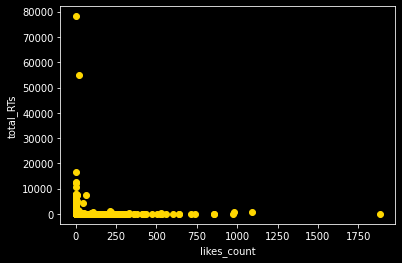

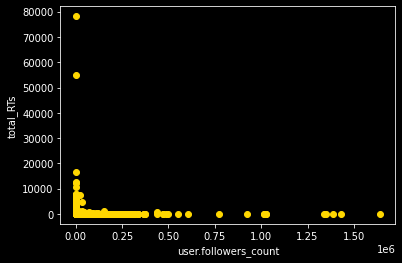

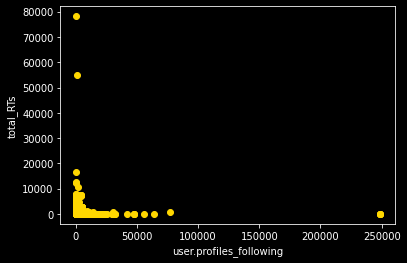

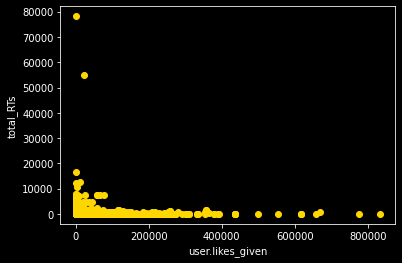

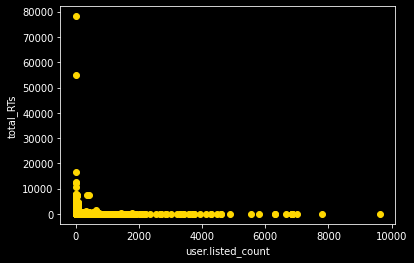

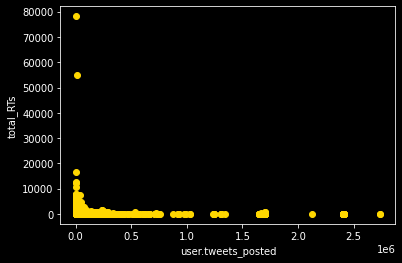

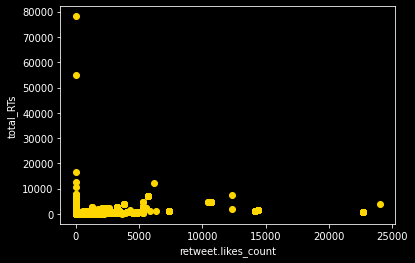

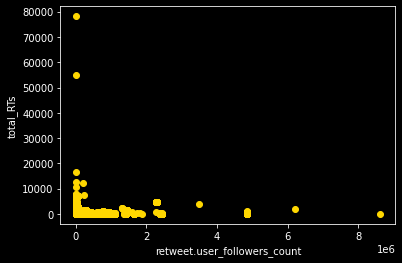

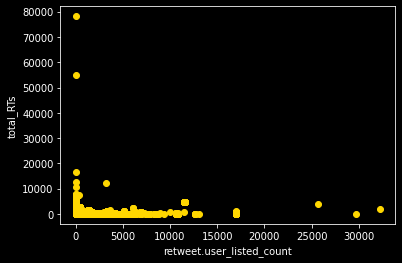

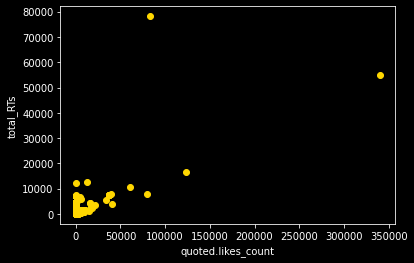

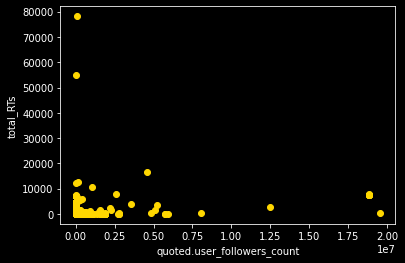

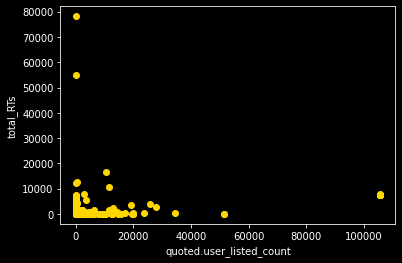

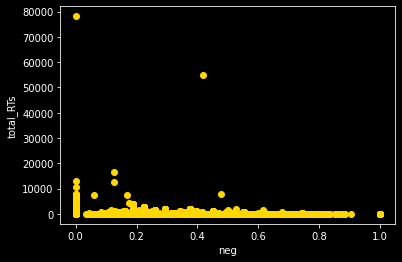

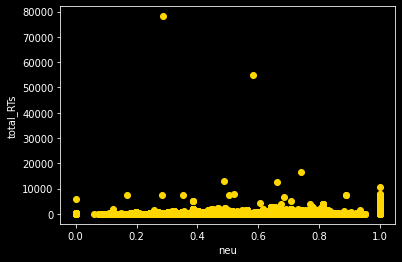

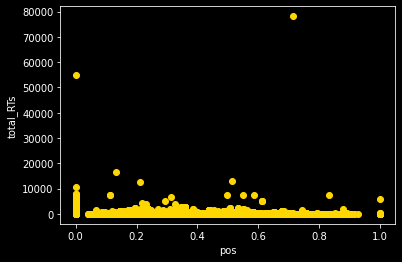

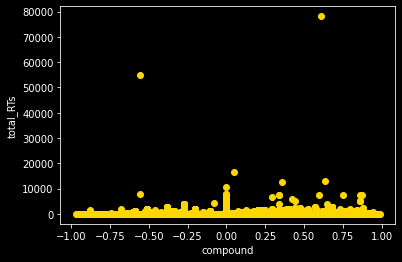

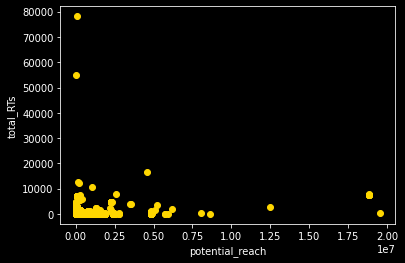

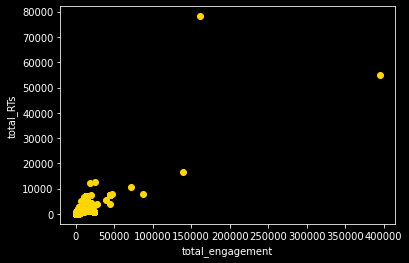

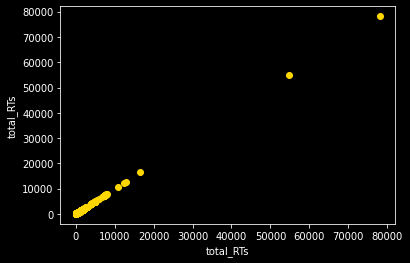

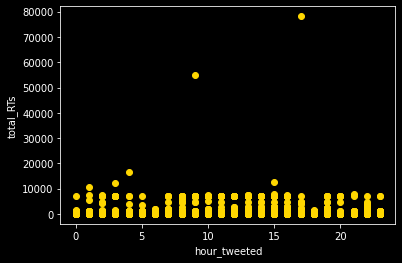

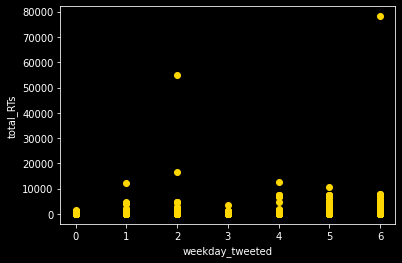

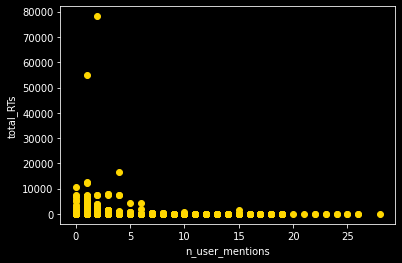

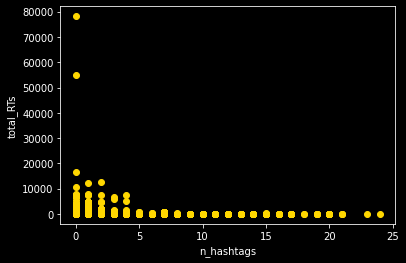

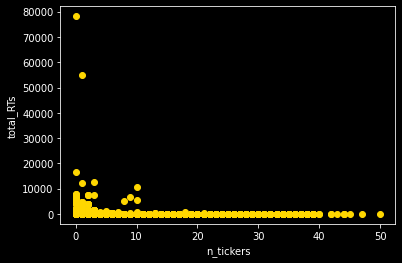

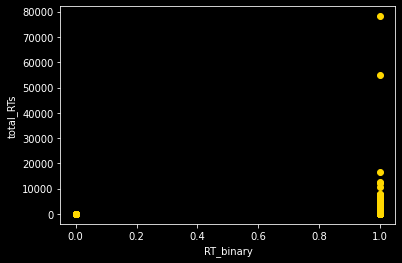

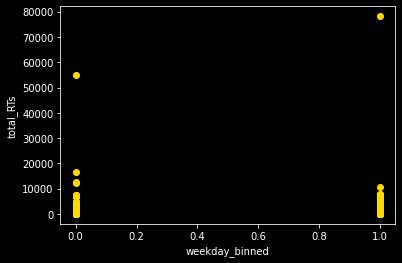

time: 6.63 s (started: 2022-04-04 15:32:04 +00:00)


In [53]:
# Creating our numeric DataFrame and dropping the columns that are non-numeric or not needed
nDefi = defi[defi.describe().columns].drop(columns=['user.id', 'retweet_count', 'quoted.re-retweet_count'], axis=1)

# Checking for a linear relationship

for column in nDefi.columns:
    plt.scatter(data=nDefi, y="total_RTs", x=column, color='gold')
    plt.xlabel(column)
    plt.ylabel("total_RTs")
    plt.show()

In [54]:
# Top Defi Tweets
defi[['user.screen_name', 'user.followers_count', 
      'tweet', 'date_created', 'total_engagement', 
      'total_RTs', 'likes_count', 'potential_reach', 
      'tweet.hashtags', 'tweet.$ymbols', 'query']].sort_values(by='total_RTs', ascending=False).head(20)

,user.screen_name,user.followers_count,tweet,date_created,total_engagement,total_RTs,likes_count,potential_reach,tweet.hashtags,tweet.$ymbols,query
46084,ramgutte511,4,Vary nice project do join \n \n,2022-03-20 17:37:35+00:00,160811.0,78171,0.0,95116,[],[],$BTC
5811,nikos_paxie,2119,Holy shit they just doxxed the team get thi...,2022-03-09 09:55:12+00:00,395186.0,54802,19.0,2464,[],[OHM],$OHM
7063,therealhanold,234,How funny would it be if this is crypto relate...,2022-03-09 04:03:00+00:00,139958.0,16453,2.0,4584773,[],[],$ETH
15811,MrNodefi,470,Lfg I love this project never gave up on it ...,2022-02-11 15:29:51+00:00,25327.0,12823,1.0,121838,"[nodelife, passiveincome]","[hec, ohm, strong]",$OHM
19745,midaamoy,68,Boring market so lets do a giveaway for five ...,2022-02-22 03:24:33+00:00,18642.0,12439,0.0,201548,[BTC],[BTC],$BTC
38592,KelloggKellogg9,501,for Ukraine,2022-03-19 01:38:23+00:00,71697.0,10795,0.0,1073558,[],"[btc, eth, ada, sol, algo, link, shib, doge, f...",$ALGO
49734,LatestCoinNews,245,Crypto gets attention all the,2022-03-20 21:34:45+00:00,47231.0,7995,0.0,18815328,[ETH],[],$ETH
50102,SyFranco,337,This is the most incredible exchange on the in...,2022-03-20 15:35:30+00:00,87990.0,7779,0.0,2571185,[],[],$ETH
25920,KarkKarek,41,HAVE YOU MISSED THE BOAT ON OR WE ARE INCUBA...,2022-03-19 16:19:47+00:00,20049.0,7713,0.0,246017,[],"[SOL, LUNA]",$LUNA
2432,BlowerGianpa,2927,150 fee to transfer 100 of value heres an ide...,2022-03-18 13:12:30+00:00,44877.0,7576,7.0,18813215,[FutureFi],"[ALGO, ETH]",$ALGO


time: 66.9 ms (started: 2022-04-04 15:32:10 +00:00)


In [55]:
defi[['tweet',  
      'total_RTs']].sort_values(by='total_RTs', ascending=False).head(20)['tweet'].values

array(['Vary nice project do join \n \n ',
       'Holy shit they just doxxed the  team   get this out there ohmies ',
       'How funny would it be if this is crypto related  You know a blind signing by way of  is different than an actual signing  Will his contract be in  or    are you planning on buying any virtual land  We could be neighbors  ',
       'Lfg  I love this project never gave up on it      ',
       ' Boring market so lets do a giveaway for five followers 5000 in One winner per day 1000   each next 5 daysJust',
       '          for Ukraine ', 'Crypto gets attention all the    ',
       'This is the most incredible exchange on the internet The father of   and the GOAT  ',
       ' HAVE YOU MISSED THE BOAT ON  OR WE ARE INCUBATING A CRAZY PROJECT ON VLAUNCHANNOUNCEMENT TUESDAYLETs GO',
       '150 fee to transfer 100 of value  heres an idea  next time call on The Godfather of cryptography who inventeddiscovered many of the mechanisms used in crypto today  MIT Professor  

time: 22.2 ms (started: 2022-04-04 15:32:10 +00:00)


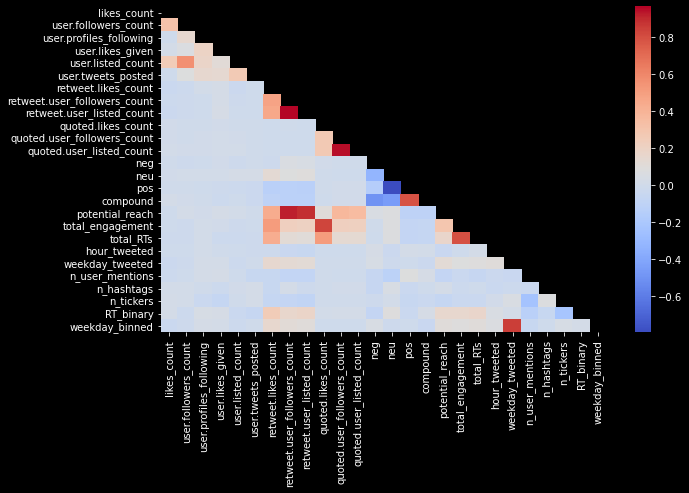

time: 783 ms (started: 2022-04-04 15:32:10 +00:00)


In [56]:
# Checking for multicollinearity. 

defi_corr = nDefi.corr()
trimask = np.triu(np.ones_like(defi_corr, dtype=bool))

plt.figure(figsize=(10,6))
sns.heatmap(defi_corr, cmap='coolwarm', mask=trimask)
plt.show()

Last but not least, let's look out for multicollinearity amongst our columns, which we can do visually through a correlation heatmap. To no surprise, many of the variables we feature engineered are highly correlated to the underlying features we built them from. Since these columns will be of more use to us farther along when we begin to visualize our results, we can create a new dataframe that includes the features we’ll want to have for our classification models. Listed below are the engineered features we’ll exclude for our modelling due to their high correlation with other variables:
- `compound`
- `retweet.likes_count` 
- `RT_binary`
- `potential_reach`
- `quoted.user_listed_count` 
- `retweet.user_listed_count`
- `retweet.user_following_count`
- `quoted.user_following_count`
- `user.tweets_posted`
- `user.listed_count`
- `total_engagement`

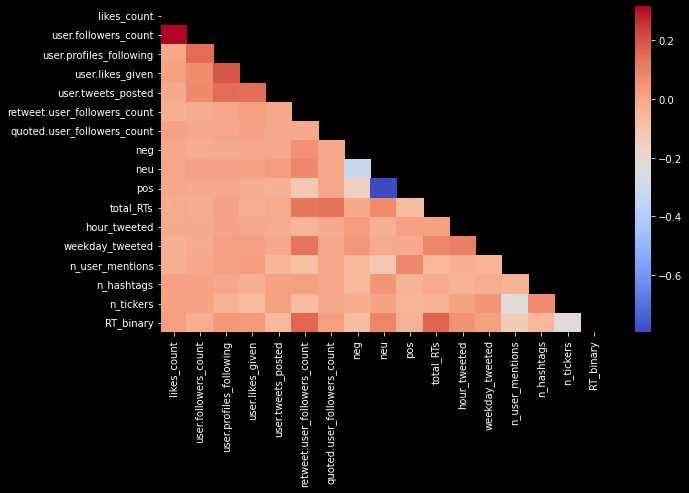

time: 487 ms (started: 2022-04-04 15:32:11 +00:00)


In [57]:
defi_corr_2 = nDefi.drop(['user.listed_count', 'retweet.user_listed_count', 'retweet.likes_count', 
                          'quoted.likes_count', 'quoted.user_listed_count', 'potential_reach', 
                          'compound', 'total_engagement', 'weekday_binned'], axis=1).corr()
trimask = np.triu(np.ones_like(defi_corr_2, dtype=bool))

plt.figure(figsize=(10,6))
sns.heatmap(defi_corr_2, cmap='coolwarm', mask=trimask)
plt.show()

# **Data Modelling**

## Train-Validation-Test Split

  Now that we've prepared our dataset and filtered out the features that are best suited for our predictive models, we can proceed with extracting a training, validation, and test set from the data. To hone back in on my original research question, I'm interested in understanding the factors most influential on whether a tweet gets retweeted and to the extent it gets shared. And the reason I'm interested in this research topic is to recommend strategies that will help grow Klima's brand presence amongst the Web3-native community. As a new startup, it's challenging to uncover data-driven insights about the brand without much headway to work with. Therefore, I thought it worthwhile to study trends amongst older, more established crypto brands to see whether I could infer these insights towards building Klima's brand presence. And from a data perspective, there's no better way to accomplish this than by using all Klima-related tweets as the test set for our modelling, while non-Klima tweets made up the training and the validation datasets. 
  
  My training and test set ratio was also ideal since Klima tweets already made up 21% of the total dataset and maintained a 79/21 train-test split for the entire dataset. I also ran a 75/25 train-validation split for my non-Klima tweets to help optimize my predictive models. I also repeated this process once for each dependent variable, `RT_binary` and `retweet_tiers`. Although I could have used the same train-validation sets for both dependent variables, I realized that any information pertaining to the `retweeted.*` and `quoted.*` predictors couldn't be included in my analysis of `RT_binary` because they gave away too much information on whether a tweet got retweeted. This is like saying we know that a tweet got retweeted because it contains data on the retweeters' followers. My research aims to generate strategies that optimize the chances for a tweet to be shared amongst a user's network. Therefore, of my remaining columns, I decided to drop `retweet.user_followers_count` and `quoted.user_followers_count` from the list of predictors for `RT_binary`, while keeping them for predicting `retweet_tiers`.

In [58]:
# Creating a dataframe for klima tweets only - THIS SHOULD BE USED AS THE TEST SET!!
klima_tweets = defi[defi['query'] == '$KLIMA']
klima_tweets.head(1)

,created_at,tweet.id,tweet,entities,metadata,user,is_quote_status,retweet_count,likes_count,retweeted_status,...,date_created,total_RTs,hour_tweeted,weekday_tweeted,n_user_mentions,n_hashtags,n_tickers,RT_binary,retweet_tiers,weekday_binned
270,Sun Mar 20 15:25:14 +0000 2022,1505566141732773888.0,Is just a matter of time \n \n \n,"{'hashtags': [{'text': 'ClimateEmergency', 'in...","{'iso_language_code': 'en', 'result_type': 're...","{'id': 1442861816820879360, 'id_str': '1442861...",False,0,1.0,{'created_at': 'Wed Feb 2 02:22:22 +0000 2022'...,...,2022-03-20 15:25:14+00:00,0,15,6,1,5,1,0,0 RTs,1


time: 36.2 ms (started: 2022-04-04 15:32:12 +00:00)


In [59]:
# Top Klima Influencers
klima_tweets[['user.screen_name', 'user.followers_count', 'tweet', 'created_at', 'total_engagement', 'total_RTs', 'likes_count', 'potential_reach', 'tweet.hashtags', 'tweet.$ymbols', 'query']].sort_values(by='total_RTs', ascending=False).head(30)

,user.screen_name,user.followers_count,tweet,created_at,total_engagement,total_RTs,likes_count,potential_reach,tweet.hashtags,tweet.$ymbols,query
12163,akaygsm47,26,Top Coins by MarketCap that reached ATH Price ...,Fri Feb 11 09:24:12 +0000 2022,11175.0,6814,1.0,68944,"[cryptocurrency, btc, satoshiclub]","[LEO, GMX, KLIMA, MV, BCT, BXS, MINE, CHORSE, ...",$KLIMA
13095,KlimaCOP,257,Hey if you want to buy cryptoassets and wo...,Tue Feb 08 02:54:05 +0000 2022,20029.0,4289,45.0,27884,[],[Klima],$KLIMA
13096,KlimaCOP,257,When will follow For the carbon thing alter...,Tue Feb 08 02:44:40 +0000 2022,19987.0,4288,4.0,27884,[],[Klima],$KLIMA
12462,KlimaCOP,257,Klima VersionLearn about Klima then decide,Thu Feb 10 05:43:00 +0000 2022,25659.0,3722,2.0,5203588,[],[klima],$KLIMA
5183,KlimaCOP,392,Pro climate action This is the time Klimate,Wed Mar 09 22:59:00 +0000 2022,20145.0,2783,1.0,12462437,[],[Klima],$KLIMA
17315,KlimaCOP,308,And is a carbon black hole,Wed Feb 16 14:10:27 +0000 2022,20385.0,2246,4.0,2225081,[],[],$KLIMA
12119,KlimaCOP,257,Buying and staking is also a strike against c...,Fri Feb 11 12:19:06 +0000 2022,11729.0,1710,2.0,5091641,[],[klima],$KLIMA
12648,KlimaCOP,257,This asset manager believe the next 1000 unico...,Wed Feb 09 18:50:24 +0000 2022,8566.0,1593,2.0,227993,[],[klima],$KLIMA
41221,khyezr,1366,How about every airbnb guest get to offset t...,Fri Mar 18 15:42:13 +0000 2022,11734.0,1480,13.0,274498,[],[],$KLIMA
12764,KlimaCOP,257,Cryptonative in big corporations means easy ad...,Wed Feb 09 12:17:45 +0000 2022,7183.0,1207,2.0,227994,[],[Klima],$KLIMA


time: 47.2 ms (started: 2022-04-04 15:32:12 +00:00)


In [60]:
# Generating a Train-Test Split w/ Klima-related Tweets acting as our test set

non_Klima = defi[defi['query'] != '$KLIMA']
print(f"The shape of our non-Klima tweets (i.e. our Training Set): {non_Klima.shape}")
print(f"The shape of our Klima-related tweets (i.e. our Test Set): {klima_tweets.shape} \n")

The shape of our non-Klima tweets (i.e. our Training Set): (43358, 52)
The shape of our Klima-related tweets (i.e. our Test Set): (11625, 52) 

time: 28.5 ms (started: 2022-04-04 15:32:12 +00:00)


In [61]:
# Running a Train-Validation Split with `RT_binary` being the dependent variable for ALL the columns. This dependent variable will be for our binary Classifier models

# Isolating multi-collinear columns
multicollinear_cols = defi_corr_2.columns.drop([ 'total_RTs', 'RT_binary'])
dropped_columns = ['retweet.user_followers_count', 'quoted.user_followers_count']

# We'll need them for the tokenizing the text data
# We also can't include information about a retweeter because the model shouldn't be allowed to know in advance whether the tweet got retweeted.
X = non_Klima[multicollinear_cols].drop(dropped_columns, axis=1)
y = non_Klima['RT_binary']

# Running a split on the non-Klima tweets, using a training-validation set
X_training_binary, X_val_binary, y_training_binary, y_val_binary = train_test_split(X, y, test_size=0.25)

# Creating a Klima-related Testing set
X_test = klima_tweets[multicollinear_cols].drop(dropped_columns, axis=1)
# X_test = klima_tweets[defi_corr_2.columns].drop(['RT_binary', 'total_RTs'], axis=1)
y_test = klima_tweets['RT_binary']

time: 26.1 ms (started: 2022-04-04 15:32:12 +00:00)


  I also graphed the baseline scores for both sets of dependent variables and was pleased to see that the distributions were very similar. For example, if someone predicted that a tweet would get retweeted every time, they would be correct 62-64% of the time. Therefore, our predictive models must do better than this if the results are to have any validity.

Text(0.5, 1.0, 'Binary RT baseline for Klima tweets')

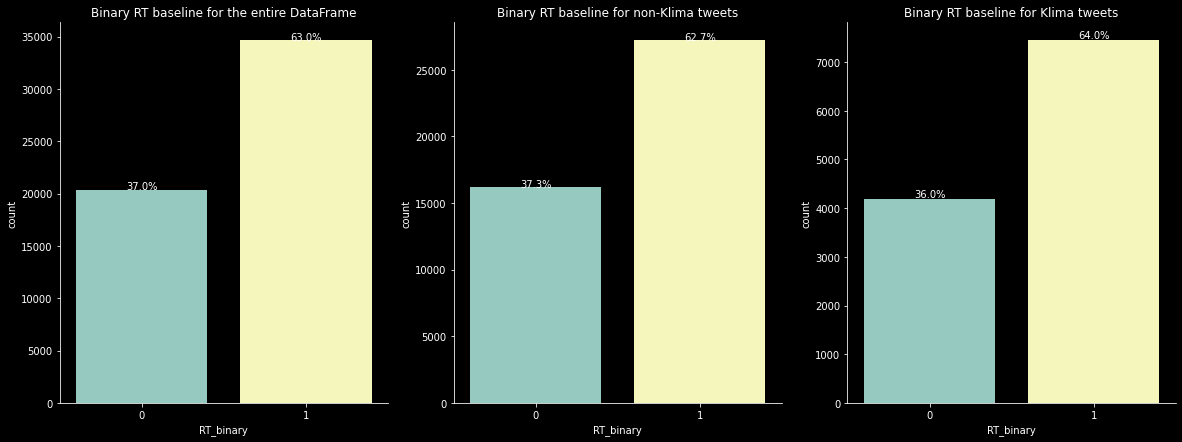

time: 483 ms (started: 2022-04-04 15:32:12 +00:00)


In [62]:
#Establishing 3 subplots within a row
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)

# Plot 1 - Histogram on the distribution of retweet tiers amongst our entire datset
plt.subplot(1,3,1)
ax1 = sns.countplot(x="RT_binary", data=defi)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/defi.shape[0])
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() + 40
    ax1.annotate(percentage, (x, y),ha='center')

plt.title("Binary RT baseline for the entire DataFrame")

# Plot 2 - Histogram on the distribution of retweet tiers amongst our Training Set
plt.subplot(1,3,2)
ax2 = sns.countplot(x="RT_binary", data=non_Klima)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/non_Klima.shape[0])
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() + 40
    ax2.annotate(percentage, (x, y),ha='center')

plt.title("Binary RT baseline for non-Klima tweets")

# Plot 3 - Histogram on the distribution of retweet tiers amongst our Test Set
plt.subplot(1,3,3)
ax3 = sns.countplot(x="RT_binary", data=klima_tweets)
for p in ax3.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/klima_tweets.shape[0])
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() + 40
    ax3.annotate(percentage, (x, y),ha='center')

sns.despine()
plt.title("Binary RT baseline for Klima tweets")

  However, if we look at the distribution of retweet tiers, the results aren't relatively as clean. For example, there's a massive difference between both datasets in the number of tweets that exceed 500 retweets. Amongst nonKlima tweets, 8.9% of all tweets exceed 500 retweets, while only 0.3% of Klima tweets experience as much success. In contrast, 30.4% of all Klima posts are retweeted 10-49 times, while only 18.8% of nonKlima posts have similar metrics. Since there's such a stark difference between the distribution of the dependent variable for both datasets, I expect that we'll have some difficulty fitting multi-class classification models in the second part of our analysis.  

Text(0.5, 1.0, 'RT tier distribution for Klima tweets')

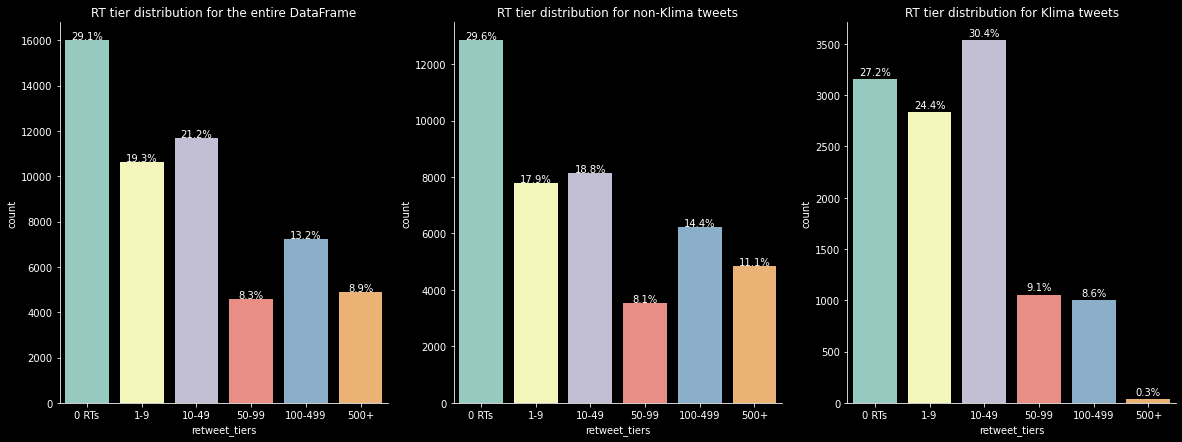

time: 630 ms (started: 2022-04-04 15:32:12 +00:00)


In [63]:
order = ['0 RTs', '1-9', '10-49', '50-99', '100-499', '500+']
padding = 10

#Establishing 3 subplots within a row
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)

# Plot 1 - Histogram on the distribution of retweet tiers amongst our entire datset
plt.subplot(1,3,1)
ax1 = sns.countplot(x="retweet_tiers", data=defi, order=order)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/defi.shape[0])
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() + 40
    ax1.annotate(percentage, (x, y),ha='center')

plt.title("RT tier distribution for the entire DataFrame")

# Plot 2 - Histogram on the distribution of retweet tiers amongst our Training Set
plt.subplot(1,3,2)
ax2 = sns.countplot(x="retweet_tiers", data=non_Klima, order=order)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/non_Klima.shape[0])
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() + 40
    ax2.annotate(percentage, (x, y),ha='center')

plt.title("RT tier distribution for non-Klima tweets")

# Plot 3 - Histogram on the distribution of retweet tiers amongst our Test Set
plt.subplot(1,3,3)
ax3 = sns.countplot(x="retweet_tiers", data=klima_tweets, order=order)
for p in ax3.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/klima_tweets.shape[0])
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() + 40
    ax3.annotate(percentage, (x, y),ha='center')

sns.despine()
plt.title("RT tier distribution for Klima tweets")

In [64]:
# Running a Train-Test Split with `retweet_tiers` being the depedent variable for our Multi-Class Classification Models

Xn = non_Klima[multicollinear_cols]
yn = non_Klima['retweet_tiers'].map({'0 RTs': 0, '1-9': 1, '10-49': 2, '50-99': 3, '100-499': 4, '500+': 5})

# Doing another split to create a validation set
X_training, X_val, y_training, y_val = train_test_split(Xn, yn, test_size=0.25)

# Creating a Klima-related Testing set
X_testing = klima_tweets[multicollinear_cols]
y_testing = klima_tweets['retweet_tiers'].map({'0 RTs': 0, '1-9': 1, '10-49': 2, '50-99': 3, '100-499': 4, '500+': 5})

time: 25.4 ms (started: 2022-04-04 15:32:13 +00:00)


### Topic Modelling

  Before we dive into modelling our target variables, I felt it was useful to apply some topic modelling techniques to parse out the topics most often discussed amongst the Klima community members. Using the `LatentDirichletAllcoation` (LDA) algorithm from the sci-kit learn library helps us do just that by identifying a collection of words that co-occur enough times in a document that the algorithm believes they share a similar theme. To prepare our text data for the natural language processing (NLP) algorithm, we used the TF-IDF vectorizer to tokenize our text data before plotting the words that were most associated with the discovered topics. From the words that we plotted, I was able to spot a few topics that the algorithm was able to pick up. For example, topic 1 seems to refer to the recent collaboration between Klima and the Digital Oceans NFT charity to raise awareness and funding for ocean cleanup initiatives through the public sale of digital art. Topic 4 refers to discussions about Klima's new product launch, aptly named Klima Infinity, which helps institutions seamlessly retire portions of their carbon footprint. Topic 5 centers around the financial and environmental arguments for investing in the project, while Topic 7 represents the language used to promote our new Klima Infinity product. Applying these topic modelling techniques as a form of social listening helps us identify the discussion themes in the community about the brand. 

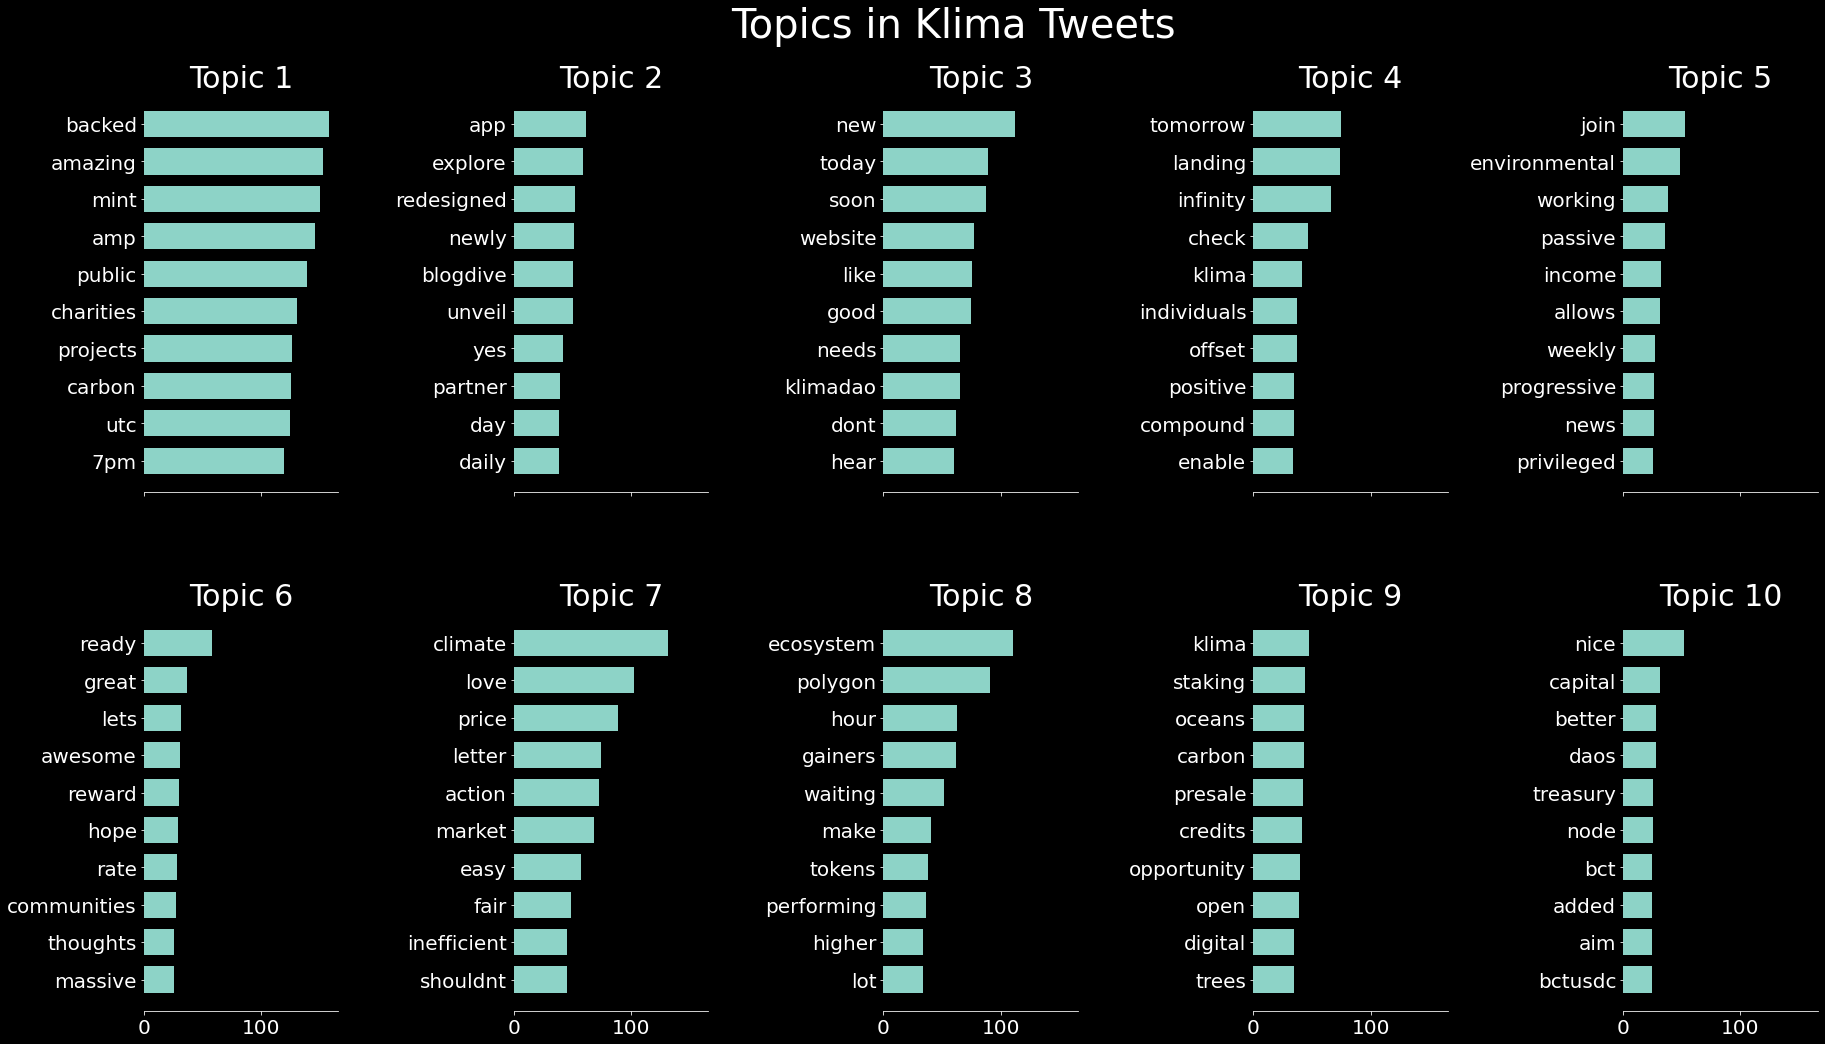

time: 9.03 s (started: 2022-04-04 15:32:13 +00:00)


In [66]:
# Exploring the topics in both Training and Test sets
# Trying the TF-IDF vectorizer for topic modelling

tfidf_vectorizer_test = TfidfVectorizer(max_df=0.95, min_df=2, stop_words="english")
tfidf_vectorizer_test.fit(klima_tweets['processed_tweets'])
tfidf_test = tfidf_vectorizer_test.transform(klima_tweets['processed_tweets'])
lda_test = LatentDirichletAllocation(n_components=10, 
                                max_iter=5, 
                                learning_method="online", 
                                learning_offset=50.0,
                                random_state=1)

lda_test.fit(tfidf_test)
test_feature_names = tfidf_vectorizer_test.get_feature_names()
plot_top_words(lda_test, test_feature_names, 10, "Topics in Klima Tweets")

### Applying a **Logistic Regression** Model 

  From here on out, our focus will now shift to modelling our dependent variables and identifying the factors that contribute the most to the model's output. The rest of this notebook will focus on the binary classification problem, outlined by our `RT_binary` dependent variable, on predicting whether a given tweet will get retweeted. The models we'll be applying for this section include Logistic Regression, Random Forest, Support Vector Machines (SVMs), Gradient Boosting, and XGBoosting. Keep in mind that the features used in this first phase only include features with numerical values. 

  In the second phase of this notebook, I included our tokenized text data as part of our predictive features to explore whether they make any difference in our model's predictive capability. In this section, I employed the use of a Naive Bayes Classifier in addition to the models we saw earlier: Logistic Regression, Random Forests, and Gradient Boosting. 


  For our first iteration of logistic regression, we'll use the `statsmodels.api` package to implement this technique so that we can quickly identify the features with low p-values. Luckily, none of our features had p-values greater than 0.05, and our model was up to 71% accurate at predicting which tweets got retweeted or not. This wasn't a bad first attempt as we exceeded our baseline target by about 9%.

In [67]:
xconstant_binary = sm.add_constant(X_training_binary)
logistic_regression = sm.Logit(y_training_binary, xconstant_binary)
logistic_regression = logistic_regression.fit()
logistic_regression.summary()

Optimization terminated successfully.
         Current function value: 0.589159
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              RT_binary   No. Observations:                32518
Model:                          Logit   Df Residuals:                    32504
Method:                           MLE   Df Model:                           13
Date:                Mon, 04 Apr 2022   Pseudo R-squ.:                  0.1090
Time:                        15:32:22   Log-Likelihood:                -19158.
converged:                       True   LL-Null:                       -21501.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.8812      0.127      6.941      0.000       0.632       1.130
likes_count                 0.0047      0.001      4.545      0.000       0.003       0.007
user.followers_count    -2.401e-06   7.45e-07     -3.222      0.001   -3.86e-06   -9.41e-07
user.profiles_following     0.0001   1.17e-05     11.735      0.000       0.000       0.000
user.likes_given         4.271e-06   6.93e-07      6.161      0.000    2.91e-06    5.63e-06
user.tweets_posted      -6.037e-06   4.73e-07    -12.772      0.000   -6.96e-06   -5.11e-06
neg                        -1.2001      0.152     -7.873      0.000      -1.499      -0.901
neu                         0.2255      0.118      1.912      0.056      -0.006       0.457
pos                        -0.5332      0.124     -4.304      0.000      -0.776      -0.290
hour_tweeted                0.0225      0.002     11.537      0.000       0.019       0.026
weekday_tweeted             0.0361      0.007      5.074      0.000       0.022       0.050
n_user_mentions            -0.2150      0.006    -33.249      0.000      -0.228      -0.202
n_hashtags                 -0.0683      0.007     -9.289      0.000      -0.083      -0.054
n_tickers                  -0.2049      0.005    -42.671      0.000      -0.214      -0.195
===========================================================================================
"""

time: 301 ms (started: 2022-04-04 15:32:22 +00:00)


In [68]:
Xval_constant = sm.add_constant(X_val_binary)
sigmoid = logistic_regression.predict(Xval_constant)
prediction0 = np.where(sigmoid > 0.5, 1, 0)
accuracy0 = (sum(prediction0 == y_val_binary) / y_val_binary.shape[0])
print(f"The logistic regression's accuracy score is {accuracy0 * 100: 0.2f}%")

The logistic regression's accuracy score is  71.13%
time: 26.7 ms (started: 2022-04-04 15:32:23 +00:00)


  I also plotted the odds ratios of each feature and found that the probability of tweets being classified as ‘neutral’ by our VADER sentiment analyzer earlier was the biggest predictor in this model, followed by the day of the week that the tweet was posted, and the time of day. However, none of these features increased the odds of a tweet getting retweeted by a significant amount.

In [69]:
odds = pd.DataFrame({"odds_ratios": np.exp(logistic_regression.params)}).sort_values(by='odds_ratios', ascending=False)
odds

,odds_ratios
const,2.413853
neu,1.252920
weekday_tweeted,1.036768
hour_tweeted,1.022752
likes_count,1.004750
user.profiles_following,1.000138
user.likes_given,1.000004
user.followers_count,0.999998
user.tweets_posted,0.999994
n_hashtags,0.933935


time: 20.2 ms (started: 2022-04-04 15:32:23 +00:00)


In [70]:
# # Applying Grid Search techniques

# param_grid_log = [
#             {'Logistic_Brain': [LogisticRegression()], 
#              'Standard_Scaler': [StandardScaler(), None],
#              'Logistic_Brain__penalty': ['l1', 'l2', 'elasticnet', None],
#              'Logistic_Brain__C': [10**i for i in range(-5, 5)],
#              'Logistic_Brain__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
#               ]

# estimators_logistic = [('Standard_Scaler', StandardScaler()),
#                       ('Dimension_Reducer', PCA(n_components=0.9)), 
#                       ('Logistic_Brain', LogisticRegression(random_state=1, max_iter=1000))]

# logistic_pipeline = Pipeline(estimators_logistic)
# logistic_pipeline.fit(X_training_binary, y_training_binary) 

# grid_log = GridSearchCV(logistic_pipeline, param_grid_log, cv=5)
# fittedgrid_log = grid_log.fit(X_training_binary, y_training_binary)

# print(f"The classification accuracy of Logistic Regression model w/ Grid Search on the training set is {fittedgrid_log.score(X_training_binary, y_training_binary) * 100: 0.2f}%")
# print(f"The classification accuracy of Logistic Regression model w/ Grid Search on the validation set is {fittedgrid_log.score(X_val_binary, y_val_binary) * 100: 0.2f}%")
# print(f"The best search parameters: {fittedgrid_log.best_params_}")
# fittedgrid_log

# # The Grid Search technique was slower, and didn't have much effect on our Logistic Regression's preformance (+1% increase)

time: 8.33 ms (started: 2022-04-04 15:32:23 +00:00)


In [71]:
# Applying the hyper optimized parameters given by the Grid Search.
# The optimized hyperparameters led to a worst result at a 5% dip.
hyper_estimators = [('Standard_Scaler', StandardScaler()),
              ('Dimension_Reducer', PCA(n_components=0.9)), 
              ('Logistic_Brain', LogisticRegression(random_state=1, max_iter=1000, C=0.1, penalty='l2', solver='liblinear'))]

hyper_logistic = Pipeline(hyper_estimators)
hyper_logistic.fit(X_training_binary, y_training_binary) 

print(f"The classification accuracy of Logistic Regression model after hyperparameter optimization on the training set is {hyper_logistic.score(X_training_binary, y_training_binary) * 100: 0.2f}%")
print(f"The classification accuracy of Logistic Regression modelafter hyperparameter optimization on the validation set is {hyper_logistic.score(X_val_binary, y_val_binary) * 100: 0.2f}%")

The classification accuracy of Logistic Regression model after hyperparameter optimization on the training set is  71.26%
The classification accuracy of Logistic Regression modelafter hyperparameter optimization on the validation set is  70.99%
time: 199 ms (started: 2022-04-04 15:32:23 +00:00)


  To try and improve the Logistic Regression model, I utilized a machine learning pipeline that would scale the data with `StandardScaler` and reduce the dimensionality to account for 90% of the variance with `PCA`. I also deployed a Grid Search algorithm to identify the combination of parameters best suited for the Logistic Regression model. Because the Grid Seach takes a significant amount of time to execute, I inputted the optimal parameters it had calculated into the ML pipeline before commenting out the code block to prevent it from running again. Unfortunately, the results didn't yield much return as the model only improved by about 1%.

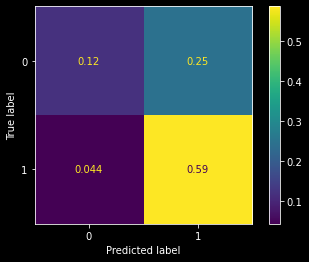

time: 218 ms (started: 2022-04-04 15:32:23 +00:00)


In [72]:
plot_confusion_matrix(hyper_logistic, X_val_binary, y_val_binary, normalize='all')

In [73]:
print(classification_report(y_val_binary, hyper_logistic.predict(X_val_binary)))

              precision    recall  f1-score   support

           0       0.74      0.33      0.46      3995
           1       0.70      0.93      0.80      6845

    accuracy                           0.71     10840
   macro avg       0.72      0.63      0.63     10840
weighted avg       0.72      0.71      0.67     10840

time: 47.5 ms (started: 2022-04-04 15:32:23 +00:00)


  From examining the confusion matrix and classification report that we generated, it seems that the model was having difficulty with recall for the negative class in the validation set. In other words, of all the actual negative cases (tweets that weren't retweeted), how many of them were predicted correctly. Therefore, to improve our recall scores, we adjusted the threshold slightly to 0.55, but this only enhanced the model's accuracy by less than a percent. However, our adjustment only improved the model's accuracy by less than a percent. We also tried fitting the results on our test set. Unsurprisingly, the model did a poor job of predicting the dependent variable (65%) as it was only 1% better than our baseline.

In [74]:
print(f"The logistic regression model's accuracy if we adjust the threshold: {(accuracy_score(y_val_binary, np.where(hyper_logistic.predict_proba(X_val_binary)[:,1] > 0.55, 1, 0)) * 100): 0.2f}% ")

The logistic regression model's accuracy if we adjust the threshold:  71.44% 
time: 17 ms (started: 2022-04-04 15:32:23 +00:00)


In [75]:
Klima_testing_accuracy = accuracy_score(y_test, np.where(hyper_logistic.predict_proba(X_test)[:,1] > 0.55, 1, 0))

print(f"Logistic Brain's Testing Accuracy on the Klima Tweets: {(Klima_testing_accuracy * 100): 0.2f}%. \n")
print(classification_report(y_test, hyper_logistic.predict(X_test)))

Logistic Brain's Testing Accuracy on the Klima Tweets:  65.16%. 

              precision    recall  f1-score   support

           0       0.52      0.17      0.25      4183
           1       0.66      0.91      0.77      7442

    accuracy                           0.64     11625
   macro avg       0.59      0.54      0.51     11625
weighted avg       0.61      0.64      0.58     11625

time: 58.2 ms (started: 2022-04-04 15:32:23 +00:00)


### Applying a Random Forest

  The next model we'll experiment with is a Random Forest model. To our surprise, the model did exceedingly well at accurately classifying our dependent variable for both our training set (99%) and our validation set (91%). Furthermore, upon closer inspection of its top predictors, the number of likes and user mentions were undoubtedly the top 2 most essential features for this model, followed by the number of profiles that the user follows and the total "likes" they've given to other posts. 

In [76]:
forbidden_forest = RandomForestClassifier()
forbidden_forest.fit(X_training_binary, y_training_binary)
print(f"The classification accuracy of our Random Forest model on our training set is {forbidden_forest.score(X_training_binary, y_training_binary) * 100: 0.2f}%")
print(f"The classification accuracy of our Random Forest model on our validation set is {forbidden_forest.score(X_val_binary, y_val_binary) * 100: 0.2f}%")

The classification accuracy of our Random Forest model on our training set is  99.95%
The classification accuracy of our Random Forest model on our validation set is  90.87%
time: 7.67 s (started: 2022-04-04 15:32:23 +00:00)


In [77]:
# Interpreting the Random Forest Model

forest_weights = pd.DataFrame({'Variable': X_training_binary.columns, 'Importance':forbidden_forest.feature_importances_}).sort_values('Importance', ascending=False)
forest_weights

,Variable,Importance
0,likes_count,0.217270
10,n_user_mentions,0.178184
3,user.likes_given,0.087401
2,user.profiles_following,0.080772
4,user.tweets_posted,0.068541
1,user.followers_count,0.066112
12,n_tickers,0.065617
6,neu,0.060282
7,pos,0.050173
8,hour_tweeted,0.043454


time: 30.4 ms (started: 2022-04-04 15:32:31 +00:00)


In [78]:
# Scaling the data to try and improve results

forest_estimators = [('Standard_Scaler', StandardScaler()), 
                     ('Old_Gods', RandomForestClassifier())]

old_gods_pipeline = Pipeline(forest_estimators)
old_gods_pipeline.fit(X_training_binary, y_training_binary) 
print(f"The classification accuracy of Random Forest model w/ optimized hyper parameters on the training set is {old_gods_pipeline.score(X_training_binary, y_training_binary) * 100: 0.2f}%")
print(f"The classification accuracy of Random Forest model w/ optimized hyperparameters on the validation set is {old_gods_pipeline.score(X_val_binary, y_val_binary) * 100: 0.2f}%")

The classification accuracy of Random Forest model w/ optimized hyper parameters on the training set is  99.95%
The classification accuracy of Random Forest model w/ optimized hyperparameters on the validation set is  90.96%
time: 7.49 s (started: 2022-04-04 15:32:31 +00:00)


  To see if we could improve the model's preformance against the validation set, we scaled the data before re-applying the Random Forest model, but the results didn't change drastically. Since the original model already produced good results in our first iteration, we decided to test it against the test set containing Klima tweets exclusively. Surprisingly, the model's accuracy dropped to 83%, 7% less than the validation set, which tells us that our test set may contain fundamentally different properties from our crypto-agnostic training-validation set.

In [79]:
# Trying our Random Forest with the Klima Test Set
print(f"The classification accuracy of our Random Forest model on our Klima Testing set is {forbidden_forest.score(X_test, y_test) * 100: 0.2f}%")

The classification accuracy of our Random Forest model on our Klima Testing set is  83.84%
time: 240 ms (started: 2022-04-04 15:32:38 +00:00)


### Applying a Linear Support Vector Machine (SVM)

  The next classification model we tried is a Linear Support Vector Machine (SVM). Unfortunately, our results were comparable to what we saw with our Logistic Regression model even after we did a grid search to optimize the algorithm’s hyperparameters. The model scored 70-71% on the training and validation set, but dropped down to 64% on the test set. The results from the classification report also almost mirrored our findings with logistic regression, where the model displayed a low recall score for the negative class.

In [80]:
linear_SVM = LinearSVC()
linear_SVM.fit(X_training_binary, y_training_binary)
print(f"The classification accuracy of our Linear SVM model on our training set is {linear_SVM.score(X_training_binary, y_training_binary) * 100: 0.2f}%")
print(f"The classification accuracy of our Linear SVM model on our validation set is {linear_SVM.score(X_val_binary, y_val_binary) * 100: 0.2f}%")

The classification accuracy of our Linear SVM model on our training set is  63.17%
The classification accuracy of our Linear SVM model on our validation set is  62.85%
time: 3.42 s (started: 2022-04-04 15:32:39 +00:00)


In [81]:
# param_grid_svm = [
#             {'Linear_SVM': [LinearSVC()], 
#              'Standard_Scaler': [StandardScaler(), None],
#              'Linear_SVM__penalty': ['l1', 'l2'],
#              'Linear_SVM__C': [10**i for i in range(-5, 5)]}
#               ]

# estimators_svm = [('Standard_Scaler', StandardScaler()),
#               ('Linear_SVM', LinearSVC(random_state=1, max_iter=1000))]

# svm_pipeline = Pipeline(estimators_svm)
# svm_pipeline.fit(X_training_binary, y_training_binary) 

# grid_log = GridSearchCV(svm_pipeline, param_grid_svm, cv=5)
# fittedgrid_svm = grid_log.fit(X_training_binary, y_training_binary)

# print(f"The classification accuracy of Linear SVM model w/ Grid Search on the training set is {fittedgrid_svm.score(X_training_binary, y_training_binary) * 100: 0.2f}%")
# print(f"The classification accuracy of Linear SVM model w/ Grid Search on the validation set is {fittedgrid_svm.score(X_val_binary, y_val_binary) * 100: 0.2f}%")
# print(f"The best search parameters: {fittedgrid_svm.best_params_}")
# fittedgrid_svm

time: 8.45 ms (started: 2022-04-04 15:32:42 +00:00)


In [82]:
# Using the optimized parameters from the grid search to another iteration of SVm

estimators_linear_svm = [('Standard_Scaler', StandardScaler()),
                          ('Linear_SVM', LinearSVC(C=10, random_state=1, max_iter=1000))]

linear_svm_pipeline = Pipeline(estimators_linear_svm)
linear_svm_pipeline.fit(X_training_binary, y_training_binary) 
print(f"The classification accuracy of Linear SVM model w/ optimized hyper parameters on the training set is {linear_svm_pipeline.score(X_training_binary, y_training_binary) * 100: 0.2f}%")
print(f"The classification accuracy of Linear SVM model w/ optimized hyperparameters on the validation set is {linear_svm_pipeline.score(X_val_binary, y_val_binary) * 100: 0.2f}%")

The classification accuracy of Linear SVM model w/ optimized hyper parameters on the training set is  71.08%
The classification accuracy of Linear SVM model w/ optimized hyperparameters on the validation set is  70.83%
time: 4.06 s (started: 2022-04-04 15:32:42 +00:00)


In [83]:
print(classification_report(y_val_binary, linear_svm_pipeline.predict(X_val_binary)))

              precision    recall  f1-score   support

           0       0.74      0.32      0.45      3995
           1       0.70      0.93      0.80      6845

    accuracy                           0.71     10840
   macro avg       0.72      0.63      0.63     10840
weighted avg       0.72      0.71      0.67     10840

time: 44.7 ms (started: 2022-04-04 15:32:46 +00:00)


In [84]:
# Trying our Linear SVM with the Klima Test Set
print(f"The classification accuracy of our Linear SVM model on our Klima Testing set is {linear_svm_pipeline.score(X_test, y_test) * 100: 0.2f}%")

The classification accuracy of our Linear SVM model on our Klima Testing set is  64.19%
time: 13.6 ms (started: 2022-04-04 15:32:46 +00:00)


### Applying Gradient Boosting

  On the other hand, our experiment with Gradient Boosting also yielded positive results. Although our accuracy for the training and validation sets were lower than Random Forests at 86% and 87%, respectively, the results for our test set were consistent with the prior measurements yet similar to the score achieved with Random Forests (0.83). However, we should note that there was some slight overfitting with the Gradient Boosting method which we could correct by adjusting the regularization parameter. And similar to Random Forests as well, the top three predictors for Gradient Boosting were the same, except that `user.likes_given` is now the 3rd strongest predictor and `neu` tweets moved up to fourth. The strong emphasis on the number of likes and user mentions was also interesting as these two factors combined were roughly 83% responsible for the model's decisions. In contrast, these same top two predictors weighed much less on our Random Forest model's decision-making, at collectively 40%. 

In [85]:
gradient_boost = GradientBoostingClassifier(verbose=1)
gradient_boost.fit(X_training_binary, y_training_binary)
print(f"The classification accuracy of our Gradient Boost model on our training set is {gradient_boost.score(X_training_binary, y_training_binary) * 100: 0.2f}%")
print(f"The classification accuracy of our Gradient Boost model on our validation set is {gradient_boost.score(X_val_binary, y_val_binary) * 100: 0.2f}%")

      Iter       Train Loss   Remaining Time 
         1           1.2345            9.78s
         2           1.1652            8.35s
         3           1.1092            7.94s
         4           1.0632            7.67s
         5           1.0252            7.45s
         6           0.9929            7.23s
         7           0.9656            7.08s
         8           0.9424            6.93s
         9           0.9221            6.81s
        10           0.9046            6.74s
        20           0.8046            5.73s
        30           0.7602            4.88s
        40           0.7335            4.14s
        50           0.7135            3.44s
        60           0.6999            2.74s
        70           0.6910            2.04s
        80           0.6823            1.36s
        90           0.6754            0.68s
       100           0.6667            0.00s
The classification accuracy of our Gradient Boost model on our training set is  86.90%
The classifi

In [86]:
# Interpreting the Gradient Boosting Model

gradient_boosting_weights = pd.DataFrame({'Variable': X_training_binary.columns, 'Importance':gradient_boost.feature_importances_}).sort_values('Importance', ascending=False)
gradient_boosting_weights

,Variable,Importance
0,likes_count,0.442643
10,n_user_mentions,0.383901
3,user.likes_given,0.032449
2,user.profiles_following,0.023813
12,n_tickers,0.022377
11,n_hashtags,0.020494
6,neu,0.020353
7,pos,0.014760
4,user.tweets_posted,0.011758
1,user.followers_count,0.009959


time: 14.5 ms (started: 2022-04-04 15:32:53 +00:00)


In [87]:
# Trying our Gradient Boosting with the Klima Test Set
print(f"The classification accuracy of our Gradient Boosting model on our Klima Testing set is {gradient_boost.score(X_test, y_test) * 100: 0.2f}%")

The classification accuracy of our Gradient Boosting model on our Klima Testing set is  83.41%
time: 27.7 ms (started: 2022-04-04 15:32:53 +00:00)


### Applying XGBoost

  We'll also experiment with another variant of gradient boosting, XGBoost, to see if we can exploit any slight preformance improvements. Not surprisingly, XGBoost performed similarly and with the same consistency as Gradient Boosting. You argue that this model *slightly* overfitted the training data as its accuracy on the validation set mirrored its preformance on the training set. It also performed similarly to its other ensemble counterparts by scoring ~83% on the test set. The main difference between itself and the previous two ensemble methods was its top predictor. With XGBoost, we saw a strong emphasis on user mentions (0.35), followed by the number of likes (0.24), as the top predictors of binary retweets, whereas Random Forest and Gradient Boosting emphasized the opposite. Community engagement metrics such as profiles following and likes given similarly were in the next tier of predictors.

In [88]:
XG_boost = XGBClassifier(n_estimators=200)
XG_boost.fit(X_training_binary, y_training_binary)
print(f"The classification accuracy of our XG Boost model on our training set is {XG_boost.score(X_training_binary, y_training_binary) * 100: 0.2f}%")
print(f"The classification accuracy of our XG Boost model on our validation set is {XG_boost.score(X_val_binary, y_val_binary) * 100: 0.2f}%")

The classification accuracy of our XG Boost model on our training set is  87.65%
The classification accuracy of our XG Boost model on our validation set is  87.67%
time: 4.12 s (started: 2022-04-04 15:32:53 +00:00)


In [89]:
# Interpreting the XG Boost Model

XG_Booster_weights = pd.DataFrame({'Variable': X_training_binary.columns, 'Importance':XG_boost.feature_importances_}).sort_values('Importance', ascending=False)
XG_Booster_weights

,Variable,Importance
10,n_user_mentions,0.326417
0,likes_count,0.291299
2,user.profiles_following,0.061586
3,user.likes_given,0.056806
12,n_tickers,0.046364
6,neu,0.035570
11,n_hashtags,0.031473
7,pos,0.030866
4,user.tweets_posted,0.027951
1,user.followers_count,0.025138


time: 23 ms (started: 2022-04-04 15:32:57 +00:00)


In [90]:
# Trying our xg Boosting with the Klima Test Set
print(f"The classification accuracy of our XGBoosting model on our Klima Testing set is {XG_boost.score(X_test, y_test) * 100: 0.2f}%")

The classification accuracy of our XGBoosting model on our Klima Testing set is  83.58%
time: 72 ms (started: 2022-04-04 15:32:57 +00:00)


### Observations on the Ensemble Machine Learning methods:

  So far, Ensemble Machine Learning methods have had the greatest success in predicting whether a tweet gets retweeted for its ability to leverage the predictive capability of several models and aggregate each of their findings towards arriving at a shared consensus. Among the training, validation, and testing set, these models never dipped below 85% accuracy, and their top predictors were consistent across the board. Tweets that received some engagement in terms of "likes" and had mentioned at least one other user were in a tier of their own across all models as the most substantial contributors towards getting retweeted.

  Amongst our second tier of predictors, the results varied a little more. Our Random Forest placed more weight on features that signalled a user's engagement with the community, such as the number of likes given by a user, profiles they follow, tweets they posted, and followers they have. Amongst the boosting algorithms, there was more variance in the second tier of features. They both placed some weight on tweets with a neutral sentiment and the number of ticker symbols and hashtags they used, along with the community engagement metrics. However, keep in mind that none of the predictors in these second tiers contributed more than 10% towards the model's decision-making, so these factors only contribute on the margins of our top 2 predictive features.

## Adding text data to the mix

  In the second phase of our analysis on whether or not a tweet gets retweeted, let's explore whether our text data will positively affect our model's accuracy. Since we're adding our processed text data to our analysis, let's go ahead and run another train-validation-test split with them included. From there on, we can test our best preforming models on this reformatted dataset.

  The vectorizer I chose to process the text data was the Bag-of-Words model over TF-IDF simply because it does cause my notebook to crash, especially when pairing it with a hyper-optimized logistic regression model. Intuitively, it makes sense why TF-IDF is more computationally taxing as it requires more operations to calculate the weight of each word token, whereas Bag-of-Words simply counts the occurrence of each word in a document. Also, there weren't any observed preformance differences between the models we chose to run after vectorizing our text data, so, therefore, it was much more practical to use Bag-Of-Words in this instance.

In [91]:
clean_plus = list(X_training_binary.columns)
clean_plus.append('processed_tweets')
print(clean_plus)

['likes_count', 'user.followers_count', 'user.profiles_following', 'user.likes_given', 'user.tweets_posted', 'neg', 'neu', 'pos', 'hour_tweeted', 'weekday_tweeted', 'n_user_mentions', 'n_hashtags', 'n_tickers', 'processed_tweets']
time: 2.48 ms (started: 2022-04-04 15:32:57 +00:00)


In [92]:
X_all = non_Klima[clean_plus]
y_all = non_Klima['RT_binary']

# Running a split on the non-Klima tweets, using a training-validation set
X_training_all, X_val_all, y_training_all, y_val_all = train_test_split(X_all, y_all, test_size=0.25)

# Creating a Klima-related Testing set
X_test_all = klima_tweets[clean_plus]
y_test_all = klima_tweets['RT_binary']

time: 27 ms (started: 2022-04-04 15:32:57 +00:00)


In [93]:
print(X_training_all.columns)
X_training_all.head()

Index(['likes_count', 'user.followers_count', 'user.profiles_following',
       'user.likes_given', 'user.tweets_posted', 'neg', 'neu', 'pos',
       'hour_tweeted', 'weekday_tweeted', 'n_user_mentions', 'n_hashtags',
       'n_tickers', 'processed_tweets'],
      dtype='object')


,likes_count,user.followers_count,user.profiles_following,user.likes_given,user.tweets_posted,neg,neu,pos,hour_tweeted,weekday_tweeted,n_user_mentions,n_hashtags,n_tickers,processed_tweets
39991,0.0,67,204,13071,8374,0.000,1.000,0.0,21,4,1,1,0,past years ive spent 7923 transactions amount ...
55270,0.0,1228,752,35037,13244,0.000,1.000,0.0,22,5,1,0,0,chainlink node operators deutsche telekom tsys...
30030,0.0,747,825,1881,2051,0.524,0.476,0.0,19,5,1,0,1,dumping random wallet follow drop addresses
56358,0.0,39,435,7367,5335,0.000,1.000,0.0,8,6,1,1,1,relation
46093,0.0,15,560,194,175,0.000,1.000,0.0,17,6,1,1,0,probably going happen network


time: 15.7 ms (started: 2022-04-04 15:32:58 +00:00)


### Tokenizing Tweets

In [94]:
vectorizer = CountVectorizer(stop_words="english", min_df=10, lowercase=True)
vectorizer.fit(X_all['processed_tweets'])
X_train_vectorized = vectorizer.transform(X_training_all['processed_tweets'])
X_val_vectorized = vectorizer.transform(X_val_all['processed_tweets'])

time: 940 ms (started: 2022-04-04 15:32:58 +00:00)


In [95]:
X_test_vectorized = vectorizer.transform(X_test_all['processed_tweets'])

time: 130 ms (started: 2022-04-04 15:32:58 +00:00)


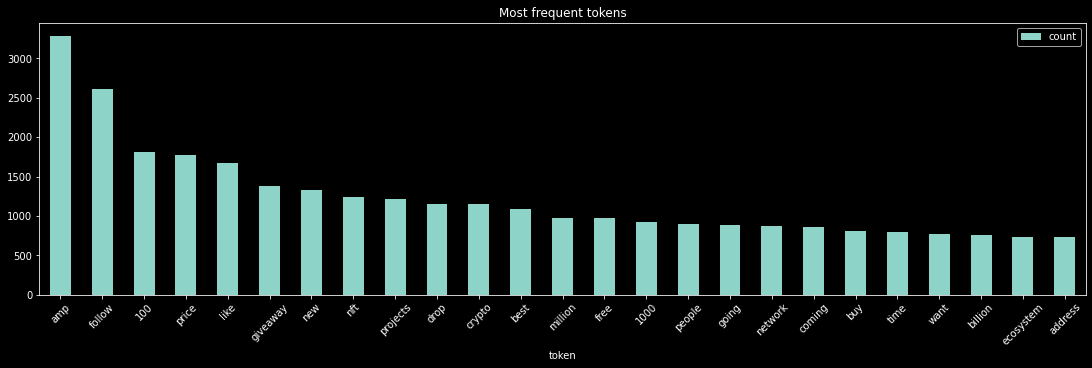

time: 974 ms (started: 2022-04-04 15:32:59 +00:00)


In [96]:
plt.style.use('dark_background')
plot_most_frequent(vectorizer.get_feature_names(), X_train_vectorized.toarray().sum(axis = 0), top=25)

In [97]:
# Separating the X-trained tokenized tweets as their own dataframe
tokenized_tweets_Xtrained = pd.DataFrame(data=X_train_vectorized.toarray(), columns=vectorizer.get_feature_names())
print(tokenized_tweets_Xtrained.shape)

(32518, 3557)
time: 225 ms (started: 2022-04-04 15:33:00 +00:00)


In [98]:
# Separating the X-validated tokenized tweets as their own dataframe
tokenized_tweets_Xvalidated = pd.DataFrame(data=X_val_vectorized.toarray(), columns=vectorizer.get_feature_names())
print(tokenized_tweets_Xvalidated.shape)

(10840, 3557)
time: 200 ms (started: 2022-04-04 15:33:00 +00:00)


In [99]:
# Separating the X-validated tokenized tweets as their own dataframe
tokenized_tweets_Xtested = pd.DataFrame(data=X_test_vectorized.toarray(), columns=vectorizer.get_feature_names())
print(tokenized_tweets_Xtested.shape)

(11625, 3557)
time: 220 ms (started: 2022-04-04 15:33:00 +00:00)


### **Applying Naive Bayes to the Tokenized Text Data**

  With our text data vectorized, let's first apply a Naive Bayes Classifier to determine whether the algorithm will be able to correctly predict a tweet based on text data alone. Our initial results were encouraging as Naive Bayes scored in the low 80s for both the training and validation set. In addition, the results from the confusion matrix were also encouraging, as the algorithm achieved a decent balance between precision and recall. 


The classification accuracy of Naive Bayes on the training set is  83.24%
The classification accuracy of Naive Bayes on the validation set is  82.37%


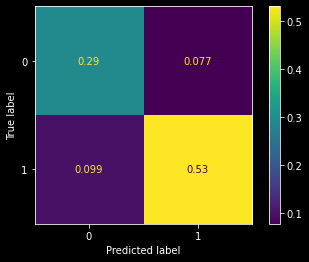

time: 4.75 s (started: 2022-04-04 15:33:00 +00:00)


In [100]:
# Using the tokenized words from the previous section

naive_bayes = MultinomialNB()
naive_bayes.fit(tokenized_tweets_Xtrained, y_training_all)
                
print(f"The classification accuracy of Naive Bayes on the training set is {naive_bayes.score(tokenized_tweets_Xtrained, y_training_all) * 100: 0.2f}%")
print(f"The classification accuracy of Naive Bayes on the validation set is {naive_bayes.score(tokenized_tweets_Xvalidated, y_val_all) * 100: 0.2f}%")
plot_confusion_matrix(naive_bayes, tokenized_tweets_Xvalidated, y_val_all, normalize='all')

In [101]:
print(classification_report(y_val_all, naive_bayes.predict(tokenized_tweets_Xvalidated)))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      4020
           1       0.87      0.84      0.86      6820

    accuracy                           0.82     10840
   macro avg       0.81      0.82      0.81     10840
weighted avg       0.83      0.82      0.82     10840

time: 199 ms (started: 2022-04-04 15:33:05 +00:00)


  However, once we applied Naive Bayes to our test set consisting of only Klima-related tweets, our results from the experiment were a bit startling. The model was only able to predict 56% of the tweets correctly, which was about 6% worse than our baseline targets. My suspicion for this near 25% preformance decline from the validation set to the test set is that the language used in Klima tweets is much different from what we'd see from the typical crypto-related tweet. Since Klima sits at the intersection between the realms of Web3 and climate activism, it shouldn't come as a surprise that NLP models would have a more challenging time generalizing to Klima tweets if they've only trained on tweets that predominantly discuss crypto and DeFi topics. 

In [102]:
# Applying Naive Bayes

print(f"The classification accuracy of Naive Bayes on the Klima Test set is {naive_bayes.score(tokenized_tweets_Xtested, y_test_all) * 100: 0.2f}%")

The classification accuracy of Naive Bayes on the Klima Test set is  54.79%
time: 225 ms (started: 2022-04-04 15:33:05 +00:00)


In [103]:
# Concatenating the text data with the numeric columns on the test set.
tokenized_tweets_Xtested = pd.DataFrame(data=X_test_vectorized.toarray(), columns=vectorizer.get_feature_names())
X_test_all_tokenized = pd.concat([X_test_all.reset_index(drop=True), tokenized_tweets_Xtested.reset_index(drop=True)], axis=1)
X_test_all_tokenized.head()

,likes_count,user.followers_count,user.profiles_following,user.likes_given,user.tweets_posted,neg,neu,pos,hour_tweeted,weekday_tweeted,...,youtube,youve,zapping,zero,zeus,zksnarks,zombie,zone,zones,zuckerbergs
0,1.0,157,151,3466,1407,0.0,0.476,0.524,15,6,...,0,0,0,0,0,0,0,0,0,0
1,0.0,45,147,1283,1102,1.0,0.000,0.000,14,6,...,0,0,0,0,0,0,0,0,0,0
2,0.0,69,139,3778,1069,0.0,0.000,0.000,14,6,...,0,0,0,0,0,0,0,0,0,0
3,1.0,432,1,27,1944,0.0,0.844,0.156,14,6,...,0,0,0,0,0,0,0,0,0,0
4,2.0,48,302,1214,842,0.0,1.000,0.000,14,6,...,0,0,0,0,0,0,0,0,0,0


time: 361 ms (started: 2022-04-04 15:33:05 +00:00)


## Concatenating the vetorized text data with numeric column

  For the rest of our predictive models, let's see if our processed text data, combined with our numerical features, can yield better results.

In [104]:
# Filtering all the numeric columns in the training-validation dataframes   [multicollinear_cols].drop(dropped_columns, axis=1)
X_train_all_in = X_training_all[clean_plus].drop(columns=['processed_tweets'], axis=1)
X_val_all_in = X_val_all[clean_plus].drop(columns=['processed_tweets'], axis=1)


# Filtering all the numeric columns in the testing dataframe.
X_test_all_in = X_test_all[clean_plus].drop(columns=['processed_tweets'], axis=1)

time: 16.1 ms (started: 2022-04-04 15:33:06 +00:00)


In [105]:
# Concatenating the tokenized X_train words with the numeric ones
X_train_all_tokenized = pd.concat([X_train_all_in.reset_index(drop=True), tokenized_tweets_Xtrained.reset_index(drop=True)], axis=1)

# Concatenating the tokenized X_val words with the numeric ones
X_val_all_tokenized = pd.concat([X_val_all_in.reset_index(drop=True), tokenized_tweets_Xvalidated.reset_index(drop=True)], axis=1)

# Concatenating the tokenized X_val words with the numeric ones
X_test_all_tokenized = pd.concat([X_test_all_in.reset_index(drop=True), tokenized_tweets_Xtested.reset_index(drop=True)], axis=1)

time: 3.52 s (started: 2022-04-04 15:33:06 +00:00)


In [106]:
print(X_train_all_tokenized.shape)
X_train_all_tokenized.tail(10)

(32518, 3570)


,likes_count,user.followers_count,user.profiles_following,user.likes_given,user.tweets_posted,neg,neu,pos,hour_tweeted,weekday_tweeted,...,youtube,youve,zapping,zero,zeus,zksnarks,zombie,zone,zones,zuckerbergs
32508,0.0,323,660,938,2220,0.000,0.458,0.542,4,4,...,0,0,0,0,0,0,0,0,0,0
32509,0.0,42,566,1162,1437,0.000,0.469,0.531,16,6,...,0,0,0,0,0,0,0,0,0,0
32510,0.0,312,2534,11803,5768,0.000,0.702,0.298,3,2,...,0,0,0,0,0,0,0,0,0,0
32511,0.0,22,566,1438,4367,0.189,0.811,0.000,22,6,...,0,0,0,0,0,0,0,0,0,0
32512,0.0,360,191,86,5295,0.000,1.000,0.000,17,6,...,0,0,0,0,0,0,0,0,0,0
32513,0.0,10,137,419,523,0.000,0.602,0.398,22,6,...,0,0,0,0,0,0,0,0,0,0
32514,0.0,60,271,9403,2381,0.000,1.000,0.000,20,6,...,0,0,0,0,0,0,0,0,0,0
32515,1.0,121,615,11444,590,0.000,0.000,0.000,0,6,...,0,0,0,0,0,0,0,0,0,0
32516,0.0,40,600,389,1147,0.524,0.476,0.000,22,6,...,0,0,0,0,0,0,0,0,0,0
32517,0.0,138,2567,2770,2065,0.000,1.000,0.000,12,2,...,0,0,0,0,0,0,0,0,0,0


time: 27.9 ms (started: 2022-04-04 15:33:09 +00:00)


### **Logistic Regression on tokenized data**

  As we predicted, our models are having a tougher time generalizing against text-data related to Klima tweets. For example, looking at our Logistic Regression, adding the text data vastly improved the model's preformance after we applied a grid search, scaled it, and then reduced its dimensions to account for 90% of the variance. These transformations improved the preformance by about 5-6% compared to the previous iteration of our Logistic Regression. However, when we assessed it against the test set, its preformance dropped by almost 30%!

In [107]:
# Using the hyperparameters from our previous grid search
logistic_classifier = LogisticRegression(solver='lbfgs', random_state=1, max_iter=1000, C=10)
logistic_classifier.fit(X_train_all_tokenized, y_training_all)
                
print(f"The classification accuracy of Logistic Regression on the training set is {logistic_classifier.score(X_train_all_tokenized, y_training_all) * 100: 0.2f}%")
print(f"The classification accuracy of Logistic Regression on the validation set is {logistic_classifier.score(X_val_all_tokenized, y_val_all) * 100: 0.2f}%")

The classification accuracy of Logistic Regression on the training set is  68.84%
The classification accuracy of Logistic Regression on the validation set is  68.87%
time: 24.6 s (started: 2022-04-04 15:33:09 +00:00)


In [108]:
# Applying a grid search to the pipeline. to Logistic Regression
# intentionally stopping this code from running as it takes forever. Comment this out when you're ready to run the code
# param_grid_hyperlog = [
#             {'Logistic_Brain': [LogisticRegression()], 
#              'Standardizer': [StandardScaler(), None],
#              'Logistic_Brain__penalty': ['l1', 'l2', 'elasticnet', None],
#              'Logistic_Brain__C': [10**i for i in range(-5, 5)],
#              'Logistic_Brain__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
#               ]


# hyper_log_estimators = [('Standardizer', StandardScaler()),
#               ('Dimensional_Reducer', PCA(n_components=0.9)), 
#               ('Logistic_Brain', LogisticRegression(random_state=1, max_iter=1000))]


# hyper_logistic_pipeline = Pipeline(hyper_log_estimators)
# hyper_logistic_pipeline.fit(X_train_all_tokenized, y_training_all) 

# grid_hyperlog = GridSearchCV(hyper_logistic_pipeline, param_grid_hyperlog, cv=5)
# fittedgrid_hyperlog = grid_hyperlog.fit(X_train_all_tokenized, y_training_all)

# print(f"The classification accuracy of Logistic Regression model w/ Grid Search on the tokenized training set is {fittedgrid_hyperlog.score(X_train_all_tokenized, y_training_all) * 100: 0.2f}%")
# print(f"The classification accuracy of Logistic Regression model w/ Grid Search on the tokenized validation set is {fittedgrid_hyperlog.score(X_val_all_tokenized, y_val_all) * 100: 0.2f}%")
# print(f"The best search parameters: {fittedgrid_hyperlog.best_params_}")
# fittedgrid_hyperlog


time: 4.21 ms (started: 2022-04-04 15:33:34 +00:00)


In [109]:
# Using the optimized parameters from the grid search we did earlier because the code block above takes too long to run!

estimators_tLogostic = [('Standard_Scaler', StandardScaler()),
                        ('PCA', PCA(n_components=0.9)),
                        ('LogisticRegression', LogisticRegression(random_state=1, max_iter=1000, C=1, penalty='l2', solver='newton-cg'))]

tokenized_logistic_pipeline = Pipeline(estimators_tLogostic)
tokenized_logistic_pipeline.fit(X_train_all_tokenized, y_training_all) 
print(f"The classification accuracy of Logistic Regression model w/ optimized hyperparameters on the training set is {tokenized_logistic_pipeline.score(X_train_all_tokenized, y_training_all) * 100: 0.2f}%")
print(f"The classification accuracy of Logistic Regression model w/ optimized hyperparameters on the validation set is {tokenized_logistic_pipeline.score(X_val_all_tokenized, y_val_all) * 100: 0.2f}%")

The classification accuracy of Logistic Regression model w/ optimized hyperparameters on the training set is  89.34%
The classification accuracy of Logistic Regression model w/ optimized hyperparameters on the validation set is  87.43%
time: 3min 18s (started: 2022-04-04 15:33:34 +00:00)


In [110]:
print(f"Logistic Regression model w/ optimized hyperparameters testing Accuracy on the Klima Tweets: {(tokenized_logistic_pipeline.score(X_test_all_tokenized, y_test_all) * 100): 0.2f}%. \n")

Logistic Regression model w/ optimized hyperparameters testing Accuracy on the Klima Tweets:  66.49%. 

time: 4.58 s (started: 2022-04-04 15:36:53 +00:00)


### **Random Forests on tokenized data**

  However, with Random Forest, we don't see as much of a preformance decline since its encompassing Decision Trees are generally better at identifying the features that lower its error rate. If we examine the dataframe containing the top contributing predictors, it's essentially the same as the previous iteration and largely ignores the text features we included.


In [111]:
forest_children = RandomForestClassifier()
forest_children.fit(X_train_all_tokenized, y_training_all)
                
print(f"The classification accuracy of Random Forests on the training set is {forest_children.score(X_train_all_tokenized, y_training_all) * 100: 0.2f}%")
print(f"The classification accuracy of Random Forests on the validation set is {forest_children.score(X_val_all_tokenized, y_val_all) * 100: 0.2f}%")
print(f"The mean 5-fold cross validation score of random forests on the validation set is {np.mean(cross_val_score(forest_children, X_val_all_tokenized, y_val_all, cv=5)) * 100: 0.2f}%")

The classification accuracy of Random Forests on the training set is  99.98%
The classification accuracy of Random Forests on the validation set is  92.72%
The mean 5-fold cross validation score of random forests on the validation set is  89.35%
time: 2min 11s (started: 2022-04-04 15:36:57 +00:00)


In [112]:
# Interpreting the Random Forest Model

forest_children_df = pd.DataFrame({'Variable': X_train_all_tokenized.columns, 'Importance':forest_children.feature_importances_}).sort_values('Importance', ascending=False)
forest_children_df.head(15)

,Variable,Importance
0,likes_count,0.115983
10,n_user_mentions,0.095411
2,user.profiles_following,0.037363
3,user.likes_given,0.034882
12,n_tickers,0.033585
6,neu,0.027147
1,user.followers_count,0.024819
4,user.tweets_posted,0.022596
7,pos,0.020188
11,n_hashtags,0.016173


time: 42 ms (started: 2022-04-04 15:39:09 +00:00)


In [113]:
print(f"The classification accuracy of Random Forests on the Klima testing set is {forest_children.score(X_test_all_tokenized, y_test_all) * 100: 0.2f}%")

The classification accuracy of Random Forests on the Klima testing set is  82.09%
time: 1.41 s (started: 2022-04-04 15:39:09 +00:00)


### **Gradient Boosting on tokenized data**

  And with gradient boosting, we see some slight overfitting with the training and validation set. However, its preformance against the test set largely mirrors its previous iteration when it was only trained against numerical features.  

In [114]:
tokenized_gradient_boost = GradientBoostingClassifier(verbose=1)
tokenized_gradient_boost.fit(X_train_all_tokenized, y_training_all)
print(f"The classification accuracy of our Gradient Boost model on our tokenized training set is {tokenized_gradient_boost.score(X_train_all_tokenized, y_training_all) * 100: 0.2f}%")
print(f"The classification accuracy of our Gradient Boost model on our tokenized validation set is {tokenized_gradient_boost.score(X_val_all_tokenized, y_val_all) * 100: 0.2f}%")


      Iter       Train Loss   Remaining Time 
         1           1.2325            2.32m
         2           1.1623            2.28m
         3           1.1056            2.24m
         4           1.0591            2.22m
         5           1.0204            2.19m
         6           0.9880            2.16m
         7           0.9603            2.14m
         8           0.9366            2.11m
         9           0.9163            2.09m
        10           0.8991            2.06m
        20           0.7975            1.81m
        30           0.7525            1.57m
        40           0.7247            1.33m
        50           0.7078            1.10m
        60           0.6934           52.36s
        70           0.6816           39.05s
        80           0.6722           25.87s
        90           0.6623           12.88s
       100           0.6550            0.00s
The classification accuracy of our Gradient Boost model on our tokenized training set is  86.94%
Th

In [115]:
# Interpreting the Gradient Boosting Model

tokenized_gboosting_weights = pd.DataFrame({'Variable': X_train_all_tokenized.columns, 'Importance':tokenized_gradient_boost.feature_importances_}).sort_values('Importance', ascending=False)
tokenized_gboosting_weights.head(10)

,Variable,Importance
0,likes_count,0.432094
10,n_user_mentions,0.372870
3,user.likes_given,0.024447
2,user.profiles_following,0.019375
6,neu,0.016515
11,n_hashtags,0.013523
1398,follow,0.013345
12,n_tickers,0.012006
396,amp,0.006465
4,user.tweets_posted,0.005994


time: 16.6 ms (started: 2022-04-04 15:41:23 +00:00)


In [116]:
print(f"The classification accuracy of our Gradient Boosting model on our tokenized Klima Testing set is {tokenized_gradient_boost.score(X_test_all_tokenized, y_test_all) * 100: 0.2f}%")

The classification accuracy of our Gradient Boosting model on our tokenized Klima Testing set is  83.29%
time: 803 ms (started: 2022-04-04 15:41:23 +00:00)


## **Visualizing Klima DAO**

  And with our models trained, alongside our interpretations of their key predictors, let's visualize our results and later re-use them for a dashboard.

In [117]:
# Top Klimates measured by the total potential reach of all their tweets.
top_klimates = klima_tweets.groupby('user.screen_name')[['user.screen_name', 'potential_reach', 
                                                         'total_engagement', 'retweet_count', 
                                                        'likes_count', 'user.followers_count', 
                                                        'user.profiles_following', 'n_user_mentions']].sum().sort_values('potential_reach', ascending=False).head(15)
top_klimates

,potential_reach,total_engagement,retweet_count,likes_count,user.followers_count,user.profiles_following,n_user_mentions
user.screen_name,,,,,,,
KlimaCOP,69759950,187521.0,1249,3255.0,141292,233078,533
daoplomacy,8042493,13120.0,600,235.0,7180,24274,87
ClimatePatri0t,6261737,18663.0,3742,0.0,1200,37400,177
KronborgB,6123219,13715.0,1734,802.0,173270,102806,216
CLencheski,6037532,1621.0,7,19.0,9531,27495,68
KlimaDAO,4433411,11579.0,1900,8881.0,4399869,1230,88
ArnoldMoger,4080936,16982.0,2697,2.0,13462,14884,175
diamondhandsKM,3967130,3279.0,148,1174.0,67644,4553,12
nikos_paxie,3933135,3510.0,6,37.0,8370,4828,0


time: 27.5 ms (started: 2022-04-04 15:41:24 +00:00)


### **Street Cred Dashboard Visualizations**

And with our models trained, alongside our interpretations of their key predictors, let's visualize the key metrics we've been analyzing as they relate to Klima and later re-use them for a dashboard. We'll first start by visualizing how the daily reach of Klima-related tweets since Feb 7th. As a reminder, the `potential_reach` we feature engineered captures all the users who could've *potentially* seen a given tweet based on the total follower count of the retweeter and the original author. After doing some qualitative digging on the official @KlimaDAO Twitter profile, it's probable that the spikes we see on the graph are largely attributed to key developments announced by the brand.

In [118]:
klima_tweets['date'] = klima_tweets['date_created'].dt.date
klima_time = klima_tweets.groupby(['date'])['potential_reach'].sum()
daily_reach = go.Figure(
    data=[
          go.Scatter(name='Klima total reach', 
                     x=klima_time.index, 
                     y=klima_time.values, 
                     fill='tonexty', 
                     marker_color='darkgreen'),
          ], 
    layout=go.Layout(title=go.layout.Title(text='Daily reach of Klima tweets'), 
                     width=900, 
                     height=400)
    )

daily_reach.update_layout(xaxis_title='Dates', 
                          yaxis_title='Total Reach', 
                          title_text='Daily reach of Klima tweets')

# daily_reach.update_xaxes(rangeslider_visible=True)
daily_reach.update_layout(template='plotly_dark')

time: 60.1 ms (started: 2022-04-04 15:41:24 +00:00)


In [119]:
RT_Klima = klima_tweets.groupby(['date'])['total_RTs'].sum()
daily_reach = go.Figure(
    data=[
          go.Scatter(name='Klima Total Retweets', 
                     x=RT_Klima.index, 
                     y=RT_Klima.values, 
                     fill='tonexty', 
                     marker_color='darkgreen'),
          ], 
    layout=go.Layout(title=go.layout.Title(text='Daily Klima Retweets'), 
                     width=1000, 
                     height=500)
    )

daily_reach.update_layout(xaxis_title='Dates', 
                          yaxis_title='Total Retweets', 
                          title_text='Daily Klima Total Retweets')

# daily_reach.update_xaxes(rangeslider_visible=True)
daily_reach.update_layout(template='plotly_dark')

time: 42.6 ms (started: 2022-04-04 15:41:24 +00:00)


In [120]:
# Applies lemmetization which is to extract the root word
nlp = spacy.load('en', disable=['parser', 'ner'])
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])

klima_tweets['processed_tweets']= klima_tweets['processed_tweets'].apply(space)

time: 26.7 s (started: 2022-04-04 15:41:24 +00:00)


In [121]:
klima_words = ' '.join([word for word in klima_tweets['processed_tweets']])

time: 5.53 ms (started: 2022-04-04 15:41:51 +00:00)


(-0.5, 599.5, 399.5, -0.5)

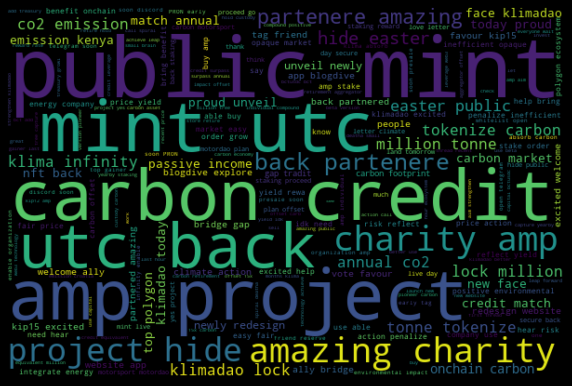

time: 1.4 s (started: 2022-04-04 15:41:51 +00:00)


In [122]:
klima_cloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(klima_words)

plt.figure(figsize=(10, 7))
plt.imshow(klima_cloud, interpolation='bilinear')
plt.axis('off')

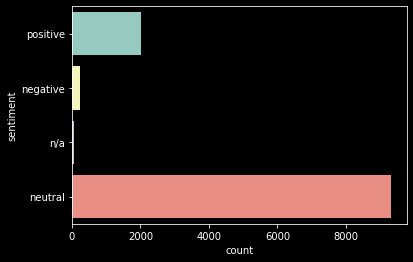

time: 150 ms (started: 2022-04-04 15:41:52 +00:00)


In [123]:
# Visualizing of klima tweet sentiment 
plt.style.use('dark_background')
sns.countplot(y='sentiment', 
             data=klima_tweets
             )
plt.show()

We also plotted the hashtags, ticker symbols, and users that were mentioned the most amongst Klima tweets. 

In [124]:
# Investigating which ticker symbols are most closely associated with Klima

tickers = []
for index, group in enumerate(klima_tweets['tweet.$ymbols']):
  if len(group) > 0:
    for s in group:
      tickers.append(s.upper())
  else:
    pass

counter = dict(Counter(tickers))
tickers = pd.DataFrame.from_dict(counter, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)

time: 23.2 ms (started: 2022-04-04 15:41:52 +00:00)


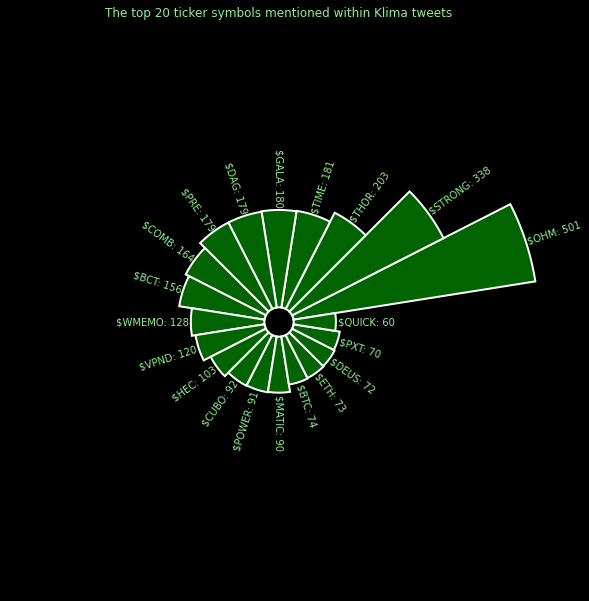

time: 250 ms (started: 2022-04-04 15:41:52 +00:00)


In [125]:
# Code taken from https://python-graph-gallery.com/circular-barplot-basic

# Reorder the dataframe
N = 20
df = tickers[1:].sort_values(by=['Count'], ascending=False).head(N)

# initialize the figure
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df['Count'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.Count + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="darkgreen"
)

# Add labels
for bar, angle, height, label, value in zip(bars, angles, heights, df.index, df.values):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=f'${label}: {int(value)}', 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",
        color='lightgreen')
    
plt.title(f'The top {N} ticker symbols mentioned within Klima tweets', 
          fontdict={'color': 'lightgreen', 
                    'verticalalignment': 'baseline',
                    'horizontalalignment': 'center'})
plt.show()

In [126]:
# Repeating this process for hashtags closely associated with Klima
hashtags = []
for index, group in enumerate(klima_tweets['tweet.hashtags']):
  if len(group) > 0:
    for s in group:
      hashtags.append(s.lower())
  else:
    pass

counter_hash = dict(Counter(hashtags))
hashtag = pd.DataFrame.from_dict(counter_hash, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)

time: 24.9 ms (started: 2022-04-04 15:41:53 +00:00)


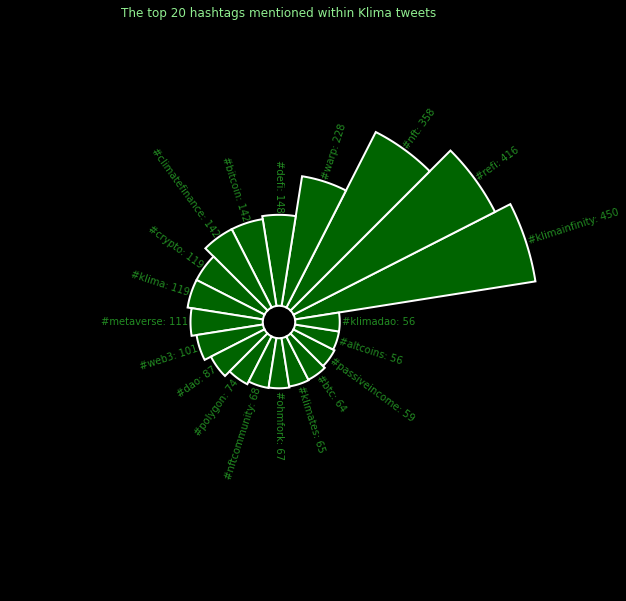

time: 280 ms (started: 2022-04-04 15:41:53 +00:00)


In [127]:
# Reorder the dataframe
N = 20
df = hashtag[1:].sort_values(by=['Count'], ascending=False).head(N)

# initialize the figure
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df['Count'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.Count + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="darkgreen",
)

# Add labels
for bar, angle, height, label, value in zip(bars, angles, heights, df.index, df.values):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=f'#{label}: {int(value)}', 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",
        color='forestgreen')
    
plt.title(f'The top {N} hashtags mentioned within Klima tweets', 
          fontdict={'color': 'lightgreen', 
                    'verticalalignment': 'baseline',
                    'horizontalalignment': 'center'})
plt.show()

In [128]:
# Repeating this process for users mentioned the most amongst Klima tweets
mentions = []
for index, group in enumerate(klima_tweets['tweet.user_mentions']):
  if len(group) > 0:
    for s in group:
      mentions.append(s.lower())
  else:
    pass

counter_mention = dict(Counter(mentions))
mentions = pd.DataFrame.from_dict(counter_mention, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)

time: 22 ms (started: 2022-04-04 15:41:53 +00:00)


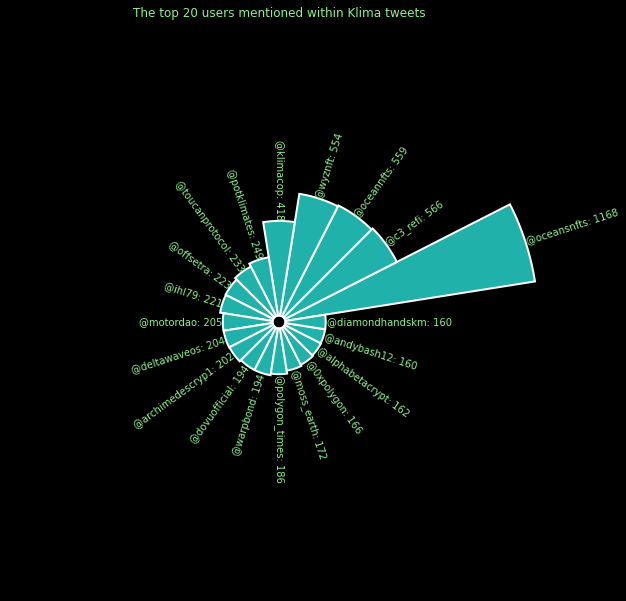

time: 291 ms (started: 2022-04-04 15:41:53 +00:00)


In [129]:
# Code taken from https://python-graph-gallery.com/circular-barplot-basic

# Reorder the dataframe
N = 20
df = mentions[1:].sort_values(by=['Count'], ascending=False).head(N)

# initialize the figure
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df['Count'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.Count + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="lightseagreen"
)

# Add labels
for bar, angle, height, label, value in zip(bars, angles, heights, df.index, df.values):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=f'@{label}: {int(value)}', 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",
        color='lightgreen')
    
plt.title(f'The top {N} users mentioned within Klima tweets', 
          fontdict={'color': 'lightgreen', 
                    'verticalalignment': 'baseline',
                    'horizontalalignment': 'center'})
plt.show()

In [130]:
retweeters = klima_tweets.loc[(klima_tweets['retweet.user_screen_names'] != '_ruizgabriel') | (klima_tweets['quoted.user_screen_name'] != '_ruizgabriel'), ['user.screen_name', 'retweeted_status', 'quoted_status']]

counter_retweeters = dict(Counter(retweeters['user.screen_name'].values))
retweeters = pd.DataFrame.from_dict(counter_retweeters, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)
retweeters.sort_values(by=['Count'], ascending=False).head(20)

,Count
KlimaCOP,211
rajasmasala,189
ihl79,119
KronborgB,112
ZkKlima,103
ClimatePatri0t,100
ArnoldMoger,98
GtradeCrypto,75
Upboat1,72
VladKO7777777,67


time: 45.8 ms (started: 2022-04-04 15:41:53 +00:00)


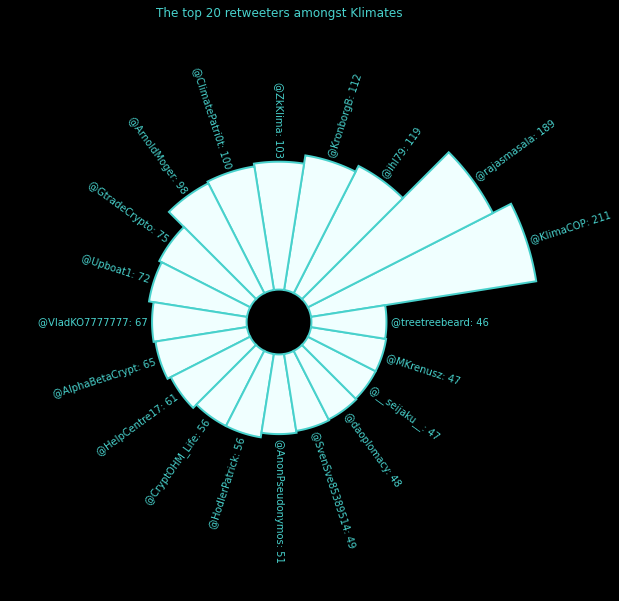

time: 815 ms (started: 2022-04-04 15:45:17 +00:00)


In [134]:
# Code taken from https://python-graph-gallery.com/circular-barplot-basic

# Reorder the dataframe
N = 20
df = retweeters.sort_values(by=['Count'], ascending=False).head(N)

# initialize the figure
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df['Count'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.Count + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="mediumturquoise",
    color="azure"
)

# Add labels
for bar, angle, height, label, value in zip(bars, angles, heights, df.index, df.values):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=f'@{label}: {int(value)}', 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",
        color='mediumturquoise')
    
plt.title(f'The top {N} retweeters amongst Klimates', 
          fontdict={'color': 'mediumturquoise', 
                    'verticalalignment': 'baseline',
                    'horizontalalignment': 'center'})
plt.show()

# **Actionable Insights**

  In terms of predicting whether or not a given Klima-related tweet will get retweeted, models that *didn't* account for text data did much better than their counterparts who factored in a tweet's content related to the tweet. Among all the Machine Learning algorithms we experimented with, those utilizing Ensemble methods like Random Forest, Gradient Boost, and XGBoost did the best in predicting retweet rates for our test set. None of them scored lower than 83% accuracy on the test set while scoring between 86-99% accuracy on the training and validation sets. They were also very consistent in identifying which features were the top predictors. 

  For example, tweets that received "likes"  and mentioned at least one other user were most likely to get a retweet by someone else. A user's community engagement also had some effect on retweets, specifically the number of profiles they followed and the likes they've given. And lastly, tweets with a "neutral" tone should fare better than negative or positive tweets.   

And with this wealth of information uncovered through the proper application of Data Science and Machine Learning techniques, the next question to ask is: How can we package these insights into strategies that will increase the likelihood of a Klima-related tweet getting retweeted? Below are the actionable insights that we'd recommend from our research.

- Although this is fairly obvious, we need to mention that tweets that entice users to "like" them will have a high chance of also being retweeted. Our research shows that "likes" and "retweets" were closely associated since they both represent users' general engagement with a post. As such, optimizing for likes is a qualitative exercise just as much as it is a quantitative exercise, so more research will be needed to pinpoint the predictors for generating "likes."

- This next strategy will be a little bit more actionable. Since tweets that mentioned one other user were generally retweeted, if you feel that your post needs to be seen by a wider audience, **mention/tag another user** that you think is likely to retweet your post. This could be a brand associated with your post, or a friend or colleague that you often communicate with. You could also try tagging specific users who are active in the community. In one of our visualizations, we graphed the top retweeters in the Klima community so try mentioning them in your tweet as they already have a history spreading the message. 

- This next recommendation is also very related with previous one about mentioning other users. **Engage with the community.** Follow other people in the community. Like, retweet, and reply to their content. Basically, be part of the community's conversation and build connections so that when you mention others in your post, they're likely to hit that magic "retweet" button. 

- Lastly, optimize the time period when you post content. There's no point in posting great content when your followers aren't online to engage with it. Although our research couldn't pinpoint which times of the day had the most users online, we can at least say that **posting on the weekends** is the best strategy for optimizing the number of people who may be online to see your content.


  To bring us back to the business question, generating highly visible content amongst Twitter circles is Klima's goal as a brand that needs public support to succeed as a critical player in the fight against climate change. At this point, it's fair to say that any publicity is good publicity if Klima is to enter the mainstream consciousness as a viable solution for funding carbon-negative projects and disincentivizing bad actors from using offesets to justify their pollution. Measuring retweets on Twitter is an excellent strategy for gauging the brand's growth since it inherently multiplies the number of people who will come across Klima-related tweets. Therefore, any insights that can improve upon this metric will help Klima increase its brand awareness as it continues to scale to achieve its mission of democratizing climate action and integrating the limits of the natural environment within the modern economy.


# **Next Steps**

Although getting retweeted is a significant first step toward posting content that will get retweeted and increasing Klima's brand visibility, the impact of this engagement will be minimal if other users don't follow suit. Therefore, in the following notebook, we'll focus on the factors that lead to a tweet going viral and attempt to model it so that we can help our fellow Klimates (Klima DAO community members) optimize their ability to impact the brand's visibility.     

Next: [**Klima DAO Twitter Analytics (Part 2)**](https://colab.research.google.com/drive/16c-QLQSxR0DfFe7do8QQbeJHrIRnutij?usp=sharing)

In [132]:
# # Downloading the cleaned version of our dataset for Part 2
# file_name = 'cleaned-defi-tweets.csv'
# defi.to_csv(file_name, index=True)
# files.download(file_name)

time: 1.12 ms (started: 2022-04-04 15:41:54 +00:00)
